In [1]:
import keras
from keras.layers import MaxPool2D,Conv2D,BatchNormalization,Flatten,Dense,Dropout
from keras.models import Sequential
from keras.utils import np_utils,to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import random

Using TensorFlow backend.


In [2]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
!unzip ../input/dogs-vs-cats/train.zip -d train

Archive:  ../input/dogs-vs-cats/train.zip
   creating: train/train/
  inflating: train/train/cat.0.jpg   
  inflating: train/train/cat.1.jpg   
  inflating: train/train/cat.10.jpg  
  inflating: train/train/cat.100.jpg  
  inflating: train/train/cat.1000.jpg  
  inflating: train/train/cat.10000.jpg  
  inflating: train/train/cat.10001.jpg  
  inflating: train/train/cat.10002.jpg  
  inflating: train/train/cat.10003.jpg  
  inflating: train/train/cat.10004.jpg  
  inflating: train/train/cat.10005.jpg  
  inflating: train/train/cat.10006.jpg  
  inflating: train/train/cat.10007.jpg  
  inflating: train/train/cat.10008.jpg  
  inflating: train/train/cat.10009.jpg  
  inflating: train/train/cat.1001.jpg  
  inflating: train/train/cat.10010.jpg  
  inflating: train/train/cat.10011.jpg  
  inflating: train/train/cat.10012.jpg  
  inflating: train/train/cat.10013.jpg  
  inflating: train/train/cat.10014.jpg  
  inflating: train/train/cat.10015.jpg  
  inflating: train/train/cat.10016.jpg  
  

  inflating: train/train/cat.1029.jpg  
  inflating: train/train/cat.10290.jpg  
  inflating: train/train/cat.10291.jpg  
  inflating: train/train/cat.10292.jpg  
  inflating: train/train/cat.10293.jpg  
  inflating: train/train/cat.10294.jpg  
  inflating: train/train/cat.10295.jpg  
  inflating: train/train/cat.10296.jpg  
  inflating: train/train/cat.10297.jpg  
  inflating: train/train/cat.10298.jpg  
  inflating: train/train/cat.10299.jpg  
  inflating: train/train/cat.103.jpg  
  inflating: train/train/cat.1030.jpg  
  inflating: train/train/cat.10300.jpg  
  inflating: train/train/cat.10301.jpg  
  inflating: train/train/cat.10302.jpg  
  inflating: train/train/cat.10303.jpg  
  inflating: train/train/cat.10304.jpg  
  inflating: train/train/cat.10305.jpg  
  inflating: train/train/cat.10306.jpg  
  inflating: train/train/cat.10307.jpg  
  inflating: train/train/cat.10308.jpg  
  inflating: train/train/cat.10309.jpg  
  inflating: train/train/cat.1031.jpg  
  inflating: train/tr

  inflating: train/train/cat.10559.jpg  
  inflating: train/train/cat.1056.jpg  
  inflating: train/train/cat.10560.jpg  
  inflating: train/train/cat.10561.jpg  
  inflating: train/train/cat.10562.jpg  
  inflating: train/train/cat.10563.jpg  
  inflating: train/train/cat.10564.jpg  
  inflating: train/train/cat.10565.jpg  
  inflating: train/train/cat.10566.jpg  
  inflating: train/train/cat.10567.jpg  
  inflating: train/train/cat.10568.jpg  
  inflating: train/train/cat.10569.jpg  
  inflating: train/train/cat.1057.jpg  
  inflating: train/train/cat.10570.jpg  
  inflating: train/train/cat.10571.jpg  
  inflating: train/train/cat.10572.jpg  
  inflating: train/train/cat.10573.jpg  
  inflating: train/train/cat.10574.jpg  
  inflating: train/train/cat.10575.jpg  
  inflating: train/train/cat.10576.jpg  
  inflating: train/train/cat.10577.jpg  
  inflating: train/train/cat.10578.jpg  
  inflating: train/train/cat.10579.jpg  
  inflating: train/train/cat.1058.jpg  
  inflating: train/

  inflating: train/train/cat.10828.jpg  
  inflating: train/train/cat.10829.jpg  
  inflating: train/train/cat.1083.jpg  
  inflating: train/train/cat.10830.jpg  
  inflating: train/train/cat.10831.jpg  
  inflating: train/train/cat.10832.jpg  
  inflating: train/train/cat.10833.jpg  
  inflating: train/train/cat.10834.jpg  
  inflating: train/train/cat.10835.jpg  
  inflating: train/train/cat.10836.jpg  
  inflating: train/train/cat.10837.jpg  
  inflating: train/train/cat.10838.jpg  
  inflating: train/train/cat.10839.jpg  
  inflating: train/train/cat.1084.jpg  
  inflating: train/train/cat.10840.jpg  
  inflating: train/train/cat.10841.jpg  
  inflating: train/train/cat.10842.jpg  
  inflating: train/train/cat.10843.jpg  
  inflating: train/train/cat.10844.jpg  
  inflating: train/train/cat.10845.jpg  
  inflating: train/train/cat.10846.jpg  
  inflating: train/train/cat.10847.jpg  
  inflating: train/train/cat.10848.jpg  
  inflating: train/train/cat.10849.jpg  
  inflating: train

  inflating: train/train/cat.11165.jpg  
  inflating: train/train/cat.11166.jpg  
  inflating: train/train/cat.11167.jpg  
  inflating: train/train/cat.11168.jpg  
  inflating: train/train/cat.11169.jpg  
  inflating: train/train/cat.1117.jpg  
  inflating: train/train/cat.11170.jpg  
  inflating: train/train/cat.11171.jpg  
  inflating: train/train/cat.11172.jpg  
  inflating: train/train/cat.11173.jpg  
  inflating: train/train/cat.11174.jpg  
  inflating: train/train/cat.11175.jpg  
  inflating: train/train/cat.11176.jpg  
  inflating: train/train/cat.11177.jpg  
  inflating: train/train/cat.11178.jpg  
  inflating: train/train/cat.11179.jpg  
  inflating: train/train/cat.1118.jpg  
  inflating: train/train/cat.11180.jpg  
  inflating: train/train/cat.11181.jpg  
  inflating: train/train/cat.11182.jpg  
  inflating: train/train/cat.11183.jpg  
  inflating: train/train/cat.11184.jpg  
  inflating: train/train/cat.11185.jpg  
  inflating: train/train/cat.11186.jpg  
  inflating: train

  inflating: train/train/cat.11473.jpg  
  inflating: train/train/cat.11474.jpg  
  inflating: train/train/cat.11475.jpg  
  inflating: train/train/cat.11476.jpg  
  inflating: train/train/cat.11477.jpg  
  inflating: train/train/cat.11478.jpg  
  inflating: train/train/cat.11479.jpg  
  inflating: train/train/cat.1148.jpg  
  inflating: train/train/cat.11480.jpg  
  inflating: train/train/cat.11481.jpg  
  inflating: train/train/cat.11482.jpg  
  inflating: train/train/cat.11483.jpg  
  inflating: train/train/cat.11484.jpg  
  inflating: train/train/cat.11485.jpg  
  inflating: train/train/cat.11486.jpg  
  inflating: train/train/cat.11487.jpg  
  inflating: train/train/cat.11488.jpg  
  inflating: train/train/cat.11489.jpg  
  inflating: train/train/cat.1149.jpg  
  inflating: train/train/cat.11490.jpg  
  inflating: train/train/cat.11491.jpg  
  inflating: train/train/cat.11492.jpg  
  inflating: train/train/cat.11493.jpg  
  inflating: train/train/cat.11494.jpg  
  inflating: train

  inflating: train/train/cat.11798.jpg  
  inflating: train/train/cat.11799.jpg  
  inflating: train/train/cat.118.jpg  
  inflating: train/train/cat.1180.jpg  
  inflating: train/train/cat.11800.jpg  
  inflating: train/train/cat.11801.jpg  
  inflating: train/train/cat.11802.jpg  
  inflating: train/train/cat.11803.jpg  
  inflating: train/train/cat.11804.jpg  
  inflating: train/train/cat.11805.jpg  
  inflating: train/train/cat.11806.jpg  
  inflating: train/train/cat.11807.jpg  
  inflating: train/train/cat.11808.jpg  
  inflating: train/train/cat.11809.jpg  
  inflating: train/train/cat.1181.jpg  
  inflating: train/train/cat.11810.jpg  
  inflating: train/train/cat.11811.jpg  
  inflating: train/train/cat.11812.jpg  
  inflating: train/train/cat.11813.jpg  
  inflating: train/train/cat.11814.jpg  
  inflating: train/train/cat.11815.jpg  
  inflating: train/train/cat.11816.jpg  
  inflating: train/train/cat.11817.jpg  
  inflating: train/train/cat.11818.jpg  
  inflating: train/t

  inflating: train/train/cat.12073.jpg  
  inflating: train/train/cat.12074.jpg  
  inflating: train/train/cat.12075.jpg  
  inflating: train/train/cat.12076.jpg  
  inflating: train/train/cat.12077.jpg  
  inflating: train/train/cat.12078.jpg  
  inflating: train/train/cat.12079.jpg  
  inflating: train/train/cat.1208.jpg  
  inflating: train/train/cat.12080.jpg  
  inflating: train/train/cat.12081.jpg  
  inflating: train/train/cat.12082.jpg  
  inflating: train/train/cat.12083.jpg  
  inflating: train/train/cat.12084.jpg  
  inflating: train/train/cat.12085.jpg  
  inflating: train/train/cat.12086.jpg  
  inflating: train/train/cat.12087.jpg  
  inflating: train/train/cat.12088.jpg  
  inflating: train/train/cat.12089.jpg  
  inflating: train/train/cat.1209.jpg  
  inflating: train/train/cat.12090.jpg  
  inflating: train/train/cat.12091.jpg  
  inflating: train/train/cat.12092.jpg  
  inflating: train/train/cat.12093.jpg  
  inflating: train/train/cat.12094.jpg  
  inflating: train

  inflating: train/train/cat.12379.jpg  
  inflating: train/train/cat.1238.jpg  
  inflating: train/train/cat.12380.jpg  
  inflating: train/train/cat.12381.jpg  
  inflating: train/train/cat.12382.jpg  
  inflating: train/train/cat.12383.jpg  
  inflating: train/train/cat.12384.jpg  
  inflating: train/train/cat.12385.jpg  
  inflating: train/train/cat.12386.jpg  
  inflating: train/train/cat.12387.jpg  
  inflating: train/train/cat.12388.jpg  
  inflating: train/train/cat.12389.jpg  
  inflating: train/train/cat.1239.jpg  
  inflating: train/train/cat.12390.jpg  
  inflating: train/train/cat.12391.jpg  
  inflating: train/train/cat.12392.jpg  
  inflating: train/train/cat.12393.jpg  
  inflating: train/train/cat.12394.jpg  
  inflating: train/train/cat.12395.jpg  
  inflating: train/train/cat.12396.jpg  
  inflating: train/train/cat.12397.jpg  
  inflating: train/train/cat.12398.jpg  
  inflating: train/train/cat.12399.jpg  
  inflating: train/train/cat.124.jpg  
  inflating: train/t

  inflating: train/train/cat.1414.jpg  
  inflating: train/train/cat.1415.jpg  
  inflating: train/train/cat.1416.jpg  
  inflating: train/train/cat.1417.jpg  
  inflating: train/train/cat.1418.jpg  
  inflating: train/train/cat.1419.jpg  
  inflating: train/train/cat.142.jpg  
  inflating: train/train/cat.1420.jpg  
  inflating: train/train/cat.1421.jpg  
  inflating: train/train/cat.1422.jpg  
  inflating: train/train/cat.1423.jpg  
  inflating: train/train/cat.1424.jpg  
  inflating: train/train/cat.1425.jpg  
  inflating: train/train/cat.1426.jpg  
  inflating: train/train/cat.1427.jpg  
  inflating: train/train/cat.1428.jpg  
  inflating: train/train/cat.1429.jpg  
  inflating: train/train/cat.143.jpg  
  inflating: train/train/cat.1430.jpg  
  inflating: train/train/cat.1431.jpg  
  inflating: train/train/cat.1432.jpg  
  inflating: train/train/cat.1433.jpg  
  inflating: train/train/cat.1434.jpg  
  inflating: train/train/cat.1435.jpg  
  inflating: train/train/cat.1436.jpg  
  

  inflating: train/train/cat.170.jpg  
  inflating: train/train/cat.1700.jpg  
  inflating: train/train/cat.1701.jpg  
  inflating: train/train/cat.1702.jpg  
  inflating: train/train/cat.1703.jpg  
  inflating: train/train/cat.1704.jpg  
  inflating: train/train/cat.1705.jpg  
  inflating: train/train/cat.1706.jpg  
  inflating: train/train/cat.1707.jpg  
  inflating: train/train/cat.1708.jpg  
  inflating: train/train/cat.1709.jpg  
  inflating: train/train/cat.171.jpg  
  inflating: train/train/cat.1710.jpg  
  inflating: train/train/cat.1711.jpg  
  inflating: train/train/cat.1712.jpg  
  inflating: train/train/cat.1713.jpg  
  inflating: train/train/cat.1714.jpg  
  inflating: train/train/cat.1715.jpg  
  inflating: train/train/cat.1716.jpg  
  inflating: train/train/cat.1717.jpg  
  inflating: train/train/cat.1718.jpg  
  inflating: train/train/cat.1719.jpg  
  inflating: train/train/cat.172.jpg  
  inflating: train/train/cat.1720.jpg  
  inflating: train/train/cat.1721.jpg  
  i

  inflating: train/train/cat.2016.jpg  
  inflating: train/train/cat.2017.jpg  
  inflating: train/train/cat.2018.jpg  
  inflating: train/train/cat.2019.jpg  
  inflating: train/train/cat.202.jpg  
  inflating: train/train/cat.2020.jpg  
  inflating: train/train/cat.2021.jpg  
  inflating: train/train/cat.2022.jpg  
  inflating: train/train/cat.2023.jpg  
  inflating: train/train/cat.2024.jpg  
  inflating: train/train/cat.2025.jpg  
  inflating: train/train/cat.2026.jpg  
  inflating: train/train/cat.2027.jpg  
  inflating: train/train/cat.2028.jpg  
  inflating: train/train/cat.2029.jpg  
  inflating: train/train/cat.203.jpg  
  inflating: train/train/cat.2030.jpg  
  inflating: train/train/cat.2031.jpg  
  inflating: train/train/cat.2032.jpg  
  inflating: train/train/cat.2033.jpg  
  inflating: train/train/cat.2034.jpg  
  inflating: train/train/cat.2035.jpg  
  inflating: train/train/cat.2036.jpg  
  inflating: train/train/cat.2037.jpg  
  inflating: train/train/cat.2038.jpg  
  

  inflating: train/train/cat.2303.jpg  
  inflating: train/train/cat.2304.jpg  
  inflating: train/train/cat.2305.jpg  
  inflating: train/train/cat.2306.jpg  
  inflating: train/train/cat.2307.jpg  
  inflating: train/train/cat.2308.jpg  
  inflating: train/train/cat.2309.jpg  
  inflating: train/train/cat.231.jpg  
  inflating: train/train/cat.2310.jpg  
  inflating: train/train/cat.2311.jpg  
  inflating: train/train/cat.2312.jpg  
  inflating: train/train/cat.2313.jpg  
  inflating: train/train/cat.2314.jpg  
  inflating: train/train/cat.2315.jpg  
  inflating: train/train/cat.2316.jpg  
  inflating: train/train/cat.2317.jpg  
  inflating: train/train/cat.2318.jpg  
  inflating: train/train/cat.2319.jpg  
  inflating: train/train/cat.232.jpg  
  inflating: train/train/cat.2320.jpg  
  inflating: train/train/cat.2321.jpg  
  inflating: train/train/cat.2322.jpg  
  inflating: train/train/cat.2323.jpg  
  inflating: train/train/cat.2324.jpg  
  inflating: train/train/cat.2325.jpg  
  

  inflating: train/train/cat.2615.jpg  
  inflating: train/train/cat.2616.jpg  
  inflating: train/train/cat.2617.jpg  
  inflating: train/train/cat.2618.jpg  
  inflating: train/train/cat.2619.jpg  
  inflating: train/train/cat.262.jpg  
  inflating: train/train/cat.2620.jpg  
  inflating: train/train/cat.2621.jpg  
  inflating: train/train/cat.2622.jpg  
  inflating: train/train/cat.2623.jpg  
  inflating: train/train/cat.2624.jpg  
  inflating: train/train/cat.2625.jpg  
  inflating: train/train/cat.2626.jpg  
  inflating: train/train/cat.2627.jpg  
  inflating: train/train/cat.2628.jpg  
  inflating: train/train/cat.2629.jpg  
  inflating: train/train/cat.263.jpg  
  inflating: train/train/cat.2630.jpg  
  inflating: train/train/cat.2631.jpg  
  inflating: train/train/cat.2632.jpg  
  inflating: train/train/cat.2633.jpg  
  inflating: train/train/cat.2634.jpg  
  inflating: train/train/cat.2635.jpg  
  inflating: train/train/cat.2636.jpg  
  inflating: train/train/cat.2637.jpg  
  

  inflating: train/train/cat.2882.jpg  
  inflating: train/train/cat.2883.jpg  
  inflating: train/train/cat.2884.jpg  
  inflating: train/train/cat.2885.jpg  
  inflating: train/train/cat.2886.jpg  
  inflating: train/train/cat.2887.jpg  
  inflating: train/train/cat.2888.jpg  
  inflating: train/train/cat.2889.jpg  
  inflating: train/train/cat.289.jpg  
  inflating: train/train/cat.2890.jpg  
  inflating: train/train/cat.2891.jpg  
  inflating: train/train/cat.2892.jpg  
  inflating: train/train/cat.2893.jpg  
  inflating: train/train/cat.2894.jpg  
  inflating: train/train/cat.2895.jpg  
  inflating: train/train/cat.2896.jpg  
  inflating: train/train/cat.2897.jpg  
  inflating: train/train/cat.2898.jpg  
  inflating: train/train/cat.2899.jpg  
  inflating: train/train/cat.29.jpg  
  inflating: train/train/cat.290.jpg  
  inflating: train/train/cat.2900.jpg  
  inflating: train/train/cat.2901.jpg  
  inflating: train/train/cat.2902.jpg  
  inflating: train/train/cat.2903.jpg  
  in

  inflating: train/train/cat.3177.jpg  
  inflating: train/train/cat.3178.jpg  
  inflating: train/train/cat.3179.jpg  
  inflating: train/train/cat.318.jpg  
  inflating: train/train/cat.3180.jpg  
  inflating: train/train/cat.3181.jpg  
  inflating: train/train/cat.3182.jpg  
  inflating: train/train/cat.3183.jpg  
  inflating: train/train/cat.3184.jpg  
  inflating: train/train/cat.3185.jpg  
  inflating: train/train/cat.3186.jpg  
  inflating: train/train/cat.3187.jpg  
  inflating: train/train/cat.3188.jpg  
  inflating: train/train/cat.3189.jpg  
  inflating: train/train/cat.319.jpg  
  inflating: train/train/cat.3190.jpg  
  inflating: train/train/cat.3191.jpg  
  inflating: train/train/cat.3192.jpg  
  inflating: train/train/cat.3193.jpg  
  inflating: train/train/cat.3194.jpg  
  inflating: train/train/cat.3195.jpg  
  inflating: train/train/cat.3196.jpg  
  inflating: train/train/cat.3197.jpg  
  inflating: train/train/cat.3198.jpg  
  inflating: train/train/cat.3199.jpg  
  

  inflating: train/train/cat.3478.jpg  
  inflating: train/train/cat.3479.jpg  
  inflating: train/train/cat.348.jpg  
  inflating: train/train/cat.3480.jpg  
  inflating: train/train/cat.3481.jpg  
  inflating: train/train/cat.3482.jpg  
  inflating: train/train/cat.3483.jpg  
  inflating: train/train/cat.3484.jpg  
  inflating: train/train/cat.3485.jpg  
  inflating: train/train/cat.3486.jpg  
  inflating: train/train/cat.3487.jpg  
  inflating: train/train/cat.3488.jpg  
  inflating: train/train/cat.3489.jpg  
  inflating: train/train/cat.349.jpg  
  inflating: train/train/cat.3490.jpg  
  inflating: train/train/cat.3491.jpg  
  inflating: train/train/cat.3492.jpg  
  inflating: train/train/cat.3493.jpg  
  inflating: train/train/cat.3494.jpg  
  inflating: train/train/cat.3495.jpg  
  inflating: train/train/cat.3496.jpg  
  inflating: train/train/cat.3497.jpg  
  inflating: train/train/cat.3498.jpg  
  inflating: train/train/cat.3499.jpg  
  inflating: train/train/cat.35.jpg  
  in

  inflating: train/train/cat.3766.jpg  
  inflating: train/train/cat.3767.jpg  
  inflating: train/train/cat.3768.jpg  
  inflating: train/train/cat.3769.jpg  
  inflating: train/train/cat.377.jpg  
  inflating: train/train/cat.3770.jpg  
  inflating: train/train/cat.3771.jpg  
  inflating: train/train/cat.3772.jpg  
  inflating: train/train/cat.3773.jpg  
  inflating: train/train/cat.3774.jpg  
  inflating: train/train/cat.3775.jpg  
  inflating: train/train/cat.3776.jpg  
  inflating: train/train/cat.3777.jpg  
  inflating: train/train/cat.3778.jpg  
  inflating: train/train/cat.3779.jpg  
  inflating: train/train/cat.378.jpg  
  inflating: train/train/cat.3780.jpg  
  inflating: train/train/cat.3781.jpg  
  inflating: train/train/cat.3782.jpg  
  inflating: train/train/cat.3783.jpg  
  inflating: train/train/cat.3784.jpg  
  inflating: train/train/cat.3785.jpg  
  inflating: train/train/cat.3786.jpg  
  inflating: train/train/cat.3787.jpg  
  inflating: train/train/cat.3788.jpg  
  

  inflating: train/train/cat.4061.jpg  
  inflating: train/train/cat.4062.jpg  
  inflating: train/train/cat.4063.jpg  
  inflating: train/train/cat.4064.jpg  
  inflating: train/train/cat.4065.jpg  
  inflating: train/train/cat.4066.jpg  
  inflating: train/train/cat.4067.jpg  
  inflating: train/train/cat.4068.jpg  
  inflating: train/train/cat.4069.jpg  
  inflating: train/train/cat.407.jpg  
  inflating: train/train/cat.4070.jpg  
  inflating: train/train/cat.4071.jpg  
  inflating: train/train/cat.4072.jpg  
  inflating: train/train/cat.4073.jpg  
  inflating: train/train/cat.4074.jpg  
  inflating: train/train/cat.4075.jpg  
  inflating: train/train/cat.4076.jpg  
  inflating: train/train/cat.4077.jpg  
  inflating: train/train/cat.4078.jpg  
  inflating: train/train/cat.4079.jpg  
  inflating: train/train/cat.408.jpg  
  inflating: train/train/cat.4080.jpg  
  inflating: train/train/cat.4081.jpg  
  inflating: train/train/cat.4082.jpg  
  inflating: train/train/cat.4083.jpg  
  

  inflating: train/train/cat.4345.jpg  
  inflating: train/train/cat.4346.jpg  
  inflating: train/train/cat.4347.jpg  
  inflating: train/train/cat.4348.jpg  
  inflating: train/train/cat.4349.jpg  
  inflating: train/train/cat.435.jpg  
  inflating: train/train/cat.4350.jpg  
  inflating: train/train/cat.4351.jpg  
  inflating: train/train/cat.4352.jpg  
  inflating: train/train/cat.4353.jpg  
  inflating: train/train/cat.4354.jpg  
  inflating: train/train/cat.4355.jpg  
  inflating: train/train/cat.4356.jpg  
  inflating: train/train/cat.4357.jpg  
  inflating: train/train/cat.4358.jpg  
  inflating: train/train/cat.4359.jpg  
  inflating: train/train/cat.436.jpg  
  inflating: train/train/cat.4360.jpg  
  inflating: train/train/cat.4361.jpg  
  inflating: train/train/cat.4362.jpg  
  inflating: train/train/cat.4363.jpg  
  inflating: train/train/cat.4364.jpg  
  inflating: train/train/cat.4365.jpg  
  inflating: train/train/cat.4366.jpg  
  inflating: train/train/cat.4367.jpg  
  

  inflating: train/train/cat.4654.jpg  
  inflating: train/train/cat.4655.jpg  
  inflating: train/train/cat.4656.jpg  
  inflating: train/train/cat.4657.jpg  
  inflating: train/train/cat.4658.jpg  
  inflating: train/train/cat.4659.jpg  
  inflating: train/train/cat.466.jpg  
  inflating: train/train/cat.4660.jpg  
  inflating: train/train/cat.4661.jpg  
  inflating: train/train/cat.4662.jpg  
  inflating: train/train/cat.4663.jpg  
  inflating: train/train/cat.4664.jpg  
  inflating: train/train/cat.4665.jpg  
  inflating: train/train/cat.4666.jpg  
  inflating: train/train/cat.4667.jpg  
  inflating: train/train/cat.4668.jpg  
  inflating: train/train/cat.4669.jpg  
  inflating: train/train/cat.467.jpg  
  inflating: train/train/cat.4670.jpg  
  inflating: train/train/cat.4671.jpg  
  inflating: train/train/cat.4672.jpg  
  inflating: train/train/cat.4673.jpg  
  inflating: train/train/cat.4674.jpg  
  inflating: train/train/cat.4675.jpg  
  inflating: train/train/cat.4676.jpg  
  

  inflating: train/train/cat.4944.jpg  
  inflating: train/train/cat.4945.jpg  
  inflating: train/train/cat.4946.jpg  
  inflating: train/train/cat.4947.jpg  
  inflating: train/train/cat.4948.jpg  
  inflating: train/train/cat.4949.jpg  
  inflating: train/train/cat.495.jpg  
  inflating: train/train/cat.4950.jpg  
  inflating: train/train/cat.4951.jpg  
  inflating: train/train/cat.4952.jpg  
  inflating: train/train/cat.4953.jpg  
  inflating: train/train/cat.4954.jpg  
  inflating: train/train/cat.4955.jpg  
  inflating: train/train/cat.4956.jpg  
  inflating: train/train/cat.4957.jpg  
  inflating: train/train/cat.4958.jpg  
  inflating: train/train/cat.4959.jpg  
  inflating: train/train/cat.496.jpg  
  inflating: train/train/cat.4960.jpg  
  inflating: train/train/cat.4961.jpg  
  inflating: train/train/cat.4962.jpg  
  inflating: train/train/cat.4963.jpg  
  inflating: train/train/cat.4964.jpg  
  inflating: train/train/cat.4965.jpg  
  inflating: train/train/cat.4966.jpg  
  

  inflating: train/train/cat.5236.jpg  
  inflating: train/train/cat.5237.jpg  
  inflating: train/train/cat.5238.jpg  
  inflating: train/train/cat.5239.jpg  
  inflating: train/train/cat.524.jpg  
  inflating: train/train/cat.5240.jpg  
  inflating: train/train/cat.5241.jpg  
  inflating: train/train/cat.5242.jpg  
  inflating: train/train/cat.5243.jpg  
  inflating: train/train/cat.5244.jpg  
  inflating: train/train/cat.5245.jpg  
  inflating: train/train/cat.5246.jpg  
  inflating: train/train/cat.5247.jpg  
  inflating: train/train/cat.5248.jpg  
  inflating: train/train/cat.5249.jpg  
  inflating: train/train/cat.525.jpg  
  inflating: train/train/cat.5250.jpg  
  inflating: train/train/cat.5251.jpg  
  inflating: train/train/cat.5252.jpg  
  inflating: train/train/cat.5253.jpg  
  inflating: train/train/cat.5254.jpg  
  inflating: train/train/cat.5255.jpg  
  inflating: train/train/cat.5256.jpg  
  inflating: train/train/cat.5257.jpg  
  inflating: train/train/cat.5258.jpg  
  

  inflating: train/train/cat.5541.jpg  
  inflating: train/train/cat.5542.jpg  
  inflating: train/train/cat.5543.jpg  
  inflating: train/train/cat.5544.jpg  
  inflating: train/train/cat.5545.jpg  
  inflating: train/train/cat.5546.jpg  
  inflating: train/train/cat.5547.jpg  
  inflating: train/train/cat.5548.jpg  
  inflating: train/train/cat.5549.jpg  
  inflating: train/train/cat.555.jpg  
  inflating: train/train/cat.5550.jpg  
  inflating: train/train/cat.5551.jpg  
  inflating: train/train/cat.5552.jpg  
  inflating: train/train/cat.5553.jpg  
  inflating: train/train/cat.5554.jpg  
  inflating: train/train/cat.5555.jpg  
  inflating: train/train/cat.5556.jpg  
  inflating: train/train/cat.5557.jpg  
  inflating: train/train/cat.5558.jpg  
  inflating: train/train/cat.5559.jpg  
  inflating: train/train/cat.556.jpg  
  inflating: train/train/cat.5560.jpg  
  inflating: train/train/cat.5561.jpg  
  inflating: train/train/cat.5562.jpg  
  inflating: train/train/cat.5563.jpg  
  

  inflating: train/train/cat.5802.jpg  
  inflating: train/train/cat.5803.jpg  
  inflating: train/train/cat.5804.jpg  
  inflating: train/train/cat.5805.jpg  
  inflating: train/train/cat.5806.jpg  
  inflating: train/train/cat.5807.jpg  
  inflating: train/train/cat.5808.jpg  
  inflating: train/train/cat.5809.jpg  
  inflating: train/train/cat.581.jpg  
  inflating: train/train/cat.5810.jpg  
  inflating: train/train/cat.5811.jpg  
  inflating: train/train/cat.5812.jpg  
  inflating: train/train/cat.5813.jpg  
  inflating: train/train/cat.5814.jpg  
  inflating: train/train/cat.5815.jpg  
  inflating: train/train/cat.5816.jpg  
  inflating: train/train/cat.5817.jpg  
  inflating: train/train/cat.5818.jpg  
  inflating: train/train/cat.5819.jpg  
  inflating: train/train/cat.582.jpg  
  inflating: train/train/cat.5820.jpg  
  inflating: train/train/cat.5821.jpg  
  inflating: train/train/cat.5822.jpg  
  inflating: train/train/cat.5823.jpg  
  inflating: train/train/cat.5824.jpg  
  

  inflating: train/train/cat.6078.jpg  
  inflating: train/train/cat.6079.jpg  
  inflating: train/train/cat.608.jpg  
  inflating: train/train/cat.6080.jpg  
  inflating: train/train/cat.6081.jpg  
  inflating: train/train/cat.6082.jpg  
  inflating: train/train/cat.6083.jpg  
  inflating: train/train/cat.6084.jpg  
  inflating: train/train/cat.6085.jpg  
  inflating: train/train/cat.6086.jpg  
  inflating: train/train/cat.6087.jpg  
  inflating: train/train/cat.6088.jpg  
  inflating: train/train/cat.6089.jpg  
  inflating: train/train/cat.609.jpg  
  inflating: train/train/cat.6090.jpg  
  inflating: train/train/cat.6091.jpg  
  inflating: train/train/cat.6092.jpg  
  inflating: train/train/cat.6093.jpg  
  inflating: train/train/cat.6094.jpg  
  inflating: train/train/cat.6095.jpg  
  inflating: train/train/cat.6096.jpg  
  inflating: train/train/cat.6097.jpg  
  inflating: train/train/cat.6098.jpg  
  inflating: train/train/cat.6099.jpg  
  inflating: train/train/cat.61.jpg  
  in

  inflating: train/train/cat.6346.jpg  
  inflating: train/train/cat.6347.jpg  
  inflating: train/train/cat.6348.jpg  
  inflating: train/train/cat.6349.jpg  
  inflating: train/train/cat.635.jpg  
  inflating: train/train/cat.6350.jpg  
  inflating: train/train/cat.6351.jpg  
  inflating: train/train/cat.6352.jpg  
  inflating: train/train/cat.6353.jpg  
  inflating: train/train/cat.6354.jpg  
  inflating: train/train/cat.6355.jpg  
  inflating: train/train/cat.6356.jpg  
  inflating: train/train/cat.6357.jpg  
  inflating: train/train/cat.6358.jpg  
  inflating: train/train/cat.6359.jpg  
  inflating: train/train/cat.636.jpg  
  inflating: train/train/cat.6360.jpg  
  inflating: train/train/cat.6361.jpg  
  inflating: train/train/cat.6362.jpg  
  inflating: train/train/cat.6363.jpg  
  inflating: train/train/cat.6364.jpg  
  inflating: train/train/cat.6365.jpg  
  inflating: train/train/cat.6366.jpg  
  inflating: train/train/cat.6367.jpg  
  inflating: train/train/cat.6368.jpg  
  

  inflating: train/train/cat.6664.jpg  
  inflating: train/train/cat.6665.jpg  
  inflating: train/train/cat.6666.jpg  
  inflating: train/train/cat.6667.jpg  
  inflating: train/train/cat.6668.jpg  
  inflating: train/train/cat.6669.jpg  
  inflating: train/train/cat.667.jpg  
  inflating: train/train/cat.6670.jpg  
  inflating: train/train/cat.6671.jpg  
  inflating: train/train/cat.6672.jpg  
  inflating: train/train/cat.6673.jpg  
  inflating: train/train/cat.6674.jpg  
  inflating: train/train/cat.6675.jpg  
  inflating: train/train/cat.6676.jpg  
  inflating: train/train/cat.6677.jpg  
  inflating: train/train/cat.6678.jpg  
  inflating: train/train/cat.6679.jpg  
  inflating: train/train/cat.668.jpg  
  inflating: train/train/cat.6680.jpg  
  inflating: train/train/cat.6681.jpg  
  inflating: train/train/cat.6682.jpg  
  inflating: train/train/cat.6683.jpg  
  inflating: train/train/cat.6684.jpg  
  inflating: train/train/cat.6685.jpg  
  inflating: train/train/cat.6686.jpg  
  

  inflating: train/train/cat.6919.jpg  
  inflating: train/train/cat.692.jpg  
  inflating: train/train/cat.6920.jpg  
  inflating: train/train/cat.6921.jpg  
  inflating: train/train/cat.6922.jpg  
  inflating: train/train/cat.6923.jpg  
  inflating: train/train/cat.6924.jpg  
  inflating: train/train/cat.6925.jpg  
  inflating: train/train/cat.6926.jpg  
  inflating: train/train/cat.6927.jpg  
  inflating: train/train/cat.6928.jpg  
  inflating: train/train/cat.6929.jpg  
  inflating: train/train/cat.693.jpg  
  inflating: train/train/cat.6930.jpg  
  inflating: train/train/cat.6931.jpg  
  inflating: train/train/cat.6932.jpg  
  inflating: train/train/cat.6933.jpg  
  inflating: train/train/cat.6934.jpg  
  inflating: train/train/cat.6935.jpg  
  inflating: train/train/cat.6936.jpg  
  inflating: train/train/cat.6937.jpg  
  inflating: train/train/cat.6938.jpg  
  inflating: train/train/cat.6939.jpg  
  inflating: train/train/cat.694.jpg  
  inflating: train/train/cat.6940.jpg  
  i

  inflating: train/train/cat.7216.jpg  
  inflating: train/train/cat.7217.jpg  
  inflating: train/train/cat.7218.jpg  
  inflating: train/train/cat.7219.jpg  
  inflating: train/train/cat.722.jpg  
  inflating: train/train/cat.7220.jpg  
  inflating: train/train/cat.7221.jpg  
  inflating: train/train/cat.7222.jpg  
  inflating: train/train/cat.7223.jpg  
  inflating: train/train/cat.7224.jpg  
  inflating: train/train/cat.7225.jpg  
  inflating: train/train/cat.7226.jpg  
  inflating: train/train/cat.7227.jpg  
  inflating: train/train/cat.7228.jpg  
  inflating: train/train/cat.7229.jpg  
  inflating: train/train/cat.723.jpg  
  inflating: train/train/cat.7230.jpg  
  inflating: train/train/cat.7231.jpg  
  inflating: train/train/cat.7232.jpg  
  inflating: train/train/cat.7233.jpg  
  inflating: train/train/cat.7234.jpg  
  inflating: train/train/cat.7235.jpg  
  inflating: train/train/cat.7236.jpg  
  inflating: train/train/cat.7237.jpg  
  inflating: train/train/cat.7238.jpg  
  

  inflating: train/train/cat.7506.jpg  
  inflating: train/train/cat.7507.jpg  
  inflating: train/train/cat.7508.jpg  
  inflating: train/train/cat.7509.jpg  
  inflating: train/train/cat.751.jpg  
  inflating: train/train/cat.7510.jpg  
  inflating: train/train/cat.7511.jpg  
  inflating: train/train/cat.7512.jpg  
  inflating: train/train/cat.7513.jpg  
  inflating: train/train/cat.7514.jpg  
  inflating: train/train/cat.7515.jpg  
  inflating: train/train/cat.7516.jpg  
  inflating: train/train/cat.7517.jpg  
  inflating: train/train/cat.7518.jpg  
  inflating: train/train/cat.7519.jpg  
  inflating: train/train/cat.752.jpg  
  inflating: train/train/cat.7520.jpg  
  inflating: train/train/cat.7521.jpg  
  inflating: train/train/cat.7522.jpg  
  inflating: train/train/cat.7523.jpg  
  inflating: train/train/cat.7524.jpg  
  inflating: train/train/cat.7525.jpg  
  inflating: train/train/cat.7526.jpg  
  inflating: train/train/cat.7527.jpg  
  inflating: train/train/cat.7528.jpg  
  

  inflating: train/train/cat.779.jpg  
  inflating: train/train/cat.7790.jpg  
  inflating: train/train/cat.7791.jpg  
  inflating: train/train/cat.7792.jpg  
  inflating: train/train/cat.7793.jpg  
  inflating: train/train/cat.7794.jpg  
  inflating: train/train/cat.7795.jpg  
  inflating: train/train/cat.7796.jpg  
  inflating: train/train/cat.7797.jpg  
  inflating: train/train/cat.7798.jpg  
  inflating: train/train/cat.7799.jpg  
  inflating: train/train/cat.78.jpg  
  inflating: train/train/cat.780.jpg  
  inflating: train/train/cat.7800.jpg  
  inflating: train/train/cat.7801.jpg  
  inflating: train/train/cat.7802.jpg  
  inflating: train/train/cat.7803.jpg  
  inflating: train/train/cat.7804.jpg  
  inflating: train/train/cat.7805.jpg  
  inflating: train/train/cat.7806.jpg  
  inflating: train/train/cat.7807.jpg  
  inflating: train/train/cat.7808.jpg  
  inflating: train/train/cat.7809.jpg  
  inflating: train/train/cat.781.jpg  
  inflating: train/train/cat.7810.jpg  
  inf

  inflating: train/train/cat.8080.jpg  
  inflating: train/train/cat.8081.jpg  
  inflating: train/train/cat.8082.jpg  
  inflating: train/train/cat.8083.jpg  
  inflating: train/train/cat.8084.jpg  
  inflating: train/train/cat.8085.jpg  
  inflating: train/train/cat.8086.jpg  
  inflating: train/train/cat.8087.jpg  
  inflating: train/train/cat.8088.jpg  
  inflating: train/train/cat.8089.jpg  
  inflating: train/train/cat.809.jpg  
  inflating: train/train/cat.8090.jpg  
  inflating: train/train/cat.8091.jpg  
  inflating: train/train/cat.8092.jpg  
  inflating: train/train/cat.8093.jpg  
  inflating: train/train/cat.8094.jpg  
  inflating: train/train/cat.8095.jpg  
  inflating: train/train/cat.8096.jpg  
  inflating: train/train/cat.8097.jpg  
  inflating: train/train/cat.8098.jpg  
  inflating: train/train/cat.8099.jpg  
  inflating: train/train/cat.81.jpg  
  inflating: train/train/cat.810.jpg  
  inflating: train/train/cat.8100.jpg  
  inflating: train/train/cat.8101.jpg  
  in

  inflating: train/train/cat.8334.jpg  
  inflating: train/train/cat.8335.jpg  
  inflating: train/train/cat.8336.jpg  
  inflating: train/train/cat.8337.jpg  
  inflating: train/train/cat.8338.jpg  
  inflating: train/train/cat.8339.jpg  
  inflating: train/train/cat.834.jpg  
  inflating: train/train/cat.8340.jpg  
  inflating: train/train/cat.8341.jpg  
  inflating: train/train/cat.8342.jpg  
  inflating: train/train/cat.8343.jpg  
  inflating: train/train/cat.8344.jpg  
  inflating: train/train/cat.8345.jpg  
  inflating: train/train/cat.8346.jpg  
  inflating: train/train/cat.8347.jpg  
  inflating: train/train/cat.8348.jpg  
  inflating: train/train/cat.8349.jpg  
  inflating: train/train/cat.835.jpg  
  inflating: train/train/cat.8350.jpg  
  inflating: train/train/cat.8351.jpg  
  inflating: train/train/cat.8352.jpg  
  inflating: train/train/cat.8353.jpg  
  inflating: train/train/cat.8354.jpg  
  inflating: train/train/cat.8355.jpg  
  inflating: train/train/cat.8356.jpg  
  

  inflating: train/train/cat.8625.jpg  
  inflating: train/train/cat.8626.jpg  
  inflating: train/train/cat.8627.jpg  
  inflating: train/train/cat.8628.jpg  
  inflating: train/train/cat.8629.jpg  
  inflating: train/train/cat.863.jpg  
  inflating: train/train/cat.8630.jpg  
  inflating: train/train/cat.8631.jpg  
  inflating: train/train/cat.8632.jpg  
  inflating: train/train/cat.8633.jpg  
  inflating: train/train/cat.8634.jpg  
  inflating: train/train/cat.8635.jpg  
  inflating: train/train/cat.8636.jpg  
  inflating: train/train/cat.8637.jpg  
  inflating: train/train/cat.8638.jpg  
  inflating: train/train/cat.8639.jpg  
  inflating: train/train/cat.864.jpg  
  inflating: train/train/cat.8640.jpg  
  inflating: train/train/cat.8641.jpg  
  inflating: train/train/cat.8642.jpg  
  inflating: train/train/cat.8643.jpg  
  inflating: train/train/cat.8644.jpg  
  inflating: train/train/cat.8645.jpg  
  inflating: train/train/cat.8646.jpg  
  inflating: train/train/cat.8647.jpg  
  

  inflating: train/train/cat.8923.jpg  
  inflating: train/train/cat.8924.jpg  
  inflating: train/train/cat.8925.jpg  
  inflating: train/train/cat.8926.jpg  
  inflating: train/train/cat.8927.jpg  
  inflating: train/train/cat.8928.jpg  
  inflating: train/train/cat.8929.jpg  
  inflating: train/train/cat.893.jpg  
  inflating: train/train/cat.8930.jpg  
  inflating: train/train/cat.8931.jpg  
  inflating: train/train/cat.8932.jpg  
  inflating: train/train/cat.8933.jpg  
  inflating: train/train/cat.8934.jpg  
  inflating: train/train/cat.8935.jpg  
  inflating: train/train/cat.8936.jpg  
  inflating: train/train/cat.8937.jpg  
  inflating: train/train/cat.8938.jpg  
  inflating: train/train/cat.8939.jpg  
  inflating: train/train/cat.894.jpg  
  inflating: train/train/cat.8940.jpg  
  inflating: train/train/cat.8941.jpg  
  inflating: train/train/cat.8942.jpg  
  inflating: train/train/cat.8943.jpg  
  inflating: train/train/cat.8944.jpg  
  inflating: train/train/cat.8945.jpg  
  

  inflating: train/train/cat.9186.jpg  
  inflating: train/train/cat.9187.jpg  
  inflating: train/train/cat.9188.jpg  
  inflating: train/train/cat.9189.jpg  
  inflating: train/train/cat.919.jpg  
  inflating: train/train/cat.9190.jpg  
  inflating: train/train/cat.9191.jpg  
  inflating: train/train/cat.9192.jpg  
  inflating: train/train/cat.9193.jpg  
  inflating: train/train/cat.9194.jpg  
  inflating: train/train/cat.9195.jpg  
  inflating: train/train/cat.9196.jpg  
  inflating: train/train/cat.9197.jpg  
  inflating: train/train/cat.9198.jpg  
  inflating: train/train/cat.9199.jpg  
  inflating: train/train/cat.92.jpg  
  inflating: train/train/cat.920.jpg  
  inflating: train/train/cat.9200.jpg  
  inflating: train/train/cat.9201.jpg  
  inflating: train/train/cat.9202.jpg  
  inflating: train/train/cat.9203.jpg  
  inflating: train/train/cat.9204.jpg  
  inflating: train/train/cat.9205.jpg  
  inflating: train/train/cat.9206.jpg  
  inflating: train/train/cat.9207.jpg  
  in

  inflating: train/train/cat.9498.jpg  
  inflating: train/train/cat.9499.jpg  
  inflating: train/train/cat.95.jpg  
  inflating: train/train/cat.950.jpg  
  inflating: train/train/cat.9500.jpg  
  inflating: train/train/cat.9501.jpg  
  inflating: train/train/cat.9502.jpg  
  inflating: train/train/cat.9503.jpg  
  inflating: train/train/cat.9504.jpg  
  inflating: train/train/cat.9505.jpg  
  inflating: train/train/cat.9506.jpg  
  inflating: train/train/cat.9507.jpg  
  inflating: train/train/cat.9508.jpg  
  inflating: train/train/cat.9509.jpg  
  inflating: train/train/cat.951.jpg  
  inflating: train/train/cat.9510.jpg  
  inflating: train/train/cat.9511.jpg  
  inflating: train/train/cat.9512.jpg  
  inflating: train/train/cat.9513.jpg  
  inflating: train/train/cat.9514.jpg  
  inflating: train/train/cat.9515.jpg  
  inflating: train/train/cat.9516.jpg  
  inflating: train/train/cat.9517.jpg  
  inflating: train/train/cat.9518.jpg  
  inflating: train/train/cat.9519.jpg  
  in

  inflating: train/train/cat.9777.jpg  
  inflating: train/train/cat.9778.jpg  
  inflating: train/train/cat.9779.jpg  
  inflating: train/train/cat.978.jpg  
  inflating: train/train/cat.9780.jpg  
  inflating: train/train/cat.9781.jpg  
  inflating: train/train/cat.9782.jpg  
  inflating: train/train/cat.9783.jpg  
  inflating: train/train/cat.9784.jpg  
  inflating: train/train/cat.9785.jpg  
  inflating: train/train/cat.9786.jpg  
  inflating: train/train/cat.9787.jpg  
  inflating: train/train/cat.9788.jpg  
  inflating: train/train/cat.9789.jpg  
  inflating: train/train/cat.979.jpg  
  inflating: train/train/cat.9790.jpg  
  inflating: train/train/cat.9791.jpg  
  inflating: train/train/cat.9792.jpg  
  inflating: train/train/cat.9793.jpg  
  inflating: train/train/cat.9794.jpg  
  inflating: train/train/cat.9795.jpg  
  inflating: train/train/cat.9796.jpg  
  inflating: train/train/cat.9797.jpg  
  inflating: train/train/cat.9798.jpg  
  inflating: train/train/cat.9799.jpg  
  

  inflating: train/train/dog.1005.jpg  
  inflating: train/train/dog.10050.jpg  
  inflating: train/train/dog.10051.jpg  
  inflating: train/train/dog.10052.jpg  
  inflating: train/train/dog.10053.jpg  
  inflating: train/train/dog.10054.jpg  
  inflating: train/train/dog.10055.jpg  
  inflating: train/train/dog.10056.jpg  
  inflating: train/train/dog.10057.jpg  
  inflating: train/train/dog.10058.jpg  
  inflating: train/train/dog.10059.jpg  
  inflating: train/train/dog.1006.jpg  
  inflating: train/train/dog.10060.jpg  
  inflating: train/train/dog.10061.jpg  
  inflating: train/train/dog.10062.jpg  
  inflating: train/train/dog.10063.jpg  
  inflating: train/train/dog.10064.jpg  
  inflating: train/train/dog.10065.jpg  
  inflating: train/train/dog.10066.jpg  
  inflating: train/train/dog.10067.jpg  
  inflating: train/train/dog.10068.jpg  
  inflating: train/train/dog.10069.jpg  
  inflating: train/train/dog.1007.jpg  
  inflating: train/train/dog.10070.jpg  
  inflating: train/

  inflating: train/train/dog.1030.jpg  
  inflating: train/train/dog.10300.jpg  
  inflating: train/train/dog.10301.jpg  
  inflating: train/train/dog.10302.jpg  
  inflating: train/train/dog.10303.jpg  
  inflating: train/train/dog.10304.jpg  
  inflating: train/train/dog.10305.jpg  
  inflating: train/train/dog.10306.jpg  
  inflating: train/train/dog.10307.jpg  
  inflating: train/train/dog.10308.jpg  
  inflating: train/train/dog.10309.jpg  
  inflating: train/train/dog.1031.jpg  
  inflating: train/train/dog.10310.jpg  
  inflating: train/train/dog.10311.jpg  
  inflating: train/train/dog.10312.jpg  
  inflating: train/train/dog.10313.jpg  
  inflating: train/train/dog.10314.jpg  
  inflating: train/train/dog.10315.jpg  
  inflating: train/train/dog.10316.jpg  
  inflating: train/train/dog.10317.jpg  
  inflating: train/train/dog.10318.jpg  
  inflating: train/train/dog.10319.jpg  
  inflating: train/train/dog.1032.jpg  
  inflating: train/train/dog.10320.jpg  
  inflating: train/

  inflating: train/train/dog.10570.jpg  
  inflating: train/train/dog.10571.jpg  
  inflating: train/train/dog.10572.jpg  
  inflating: train/train/dog.10573.jpg  
  inflating: train/train/dog.10574.jpg  
  inflating: train/train/dog.10575.jpg  
  inflating: train/train/dog.10576.jpg  
  inflating: train/train/dog.10577.jpg  
  inflating: train/train/dog.10578.jpg  
  inflating: train/train/dog.10579.jpg  
  inflating: train/train/dog.1058.jpg  
  inflating: train/train/dog.10580.jpg  
  inflating: train/train/dog.10581.jpg  
  inflating: train/train/dog.10582.jpg  
  inflating: train/train/dog.10583.jpg  
  inflating: train/train/dog.10584.jpg  
  inflating: train/train/dog.10585.jpg  
  inflating: train/train/dog.10586.jpg  
  inflating: train/train/dog.10587.jpg  
  inflating: train/train/dog.10588.jpg  
  inflating: train/train/dog.10589.jpg  
  inflating: train/train/dog.1059.jpg  
  inflating: train/train/dog.10590.jpg  
  inflating: train/train/dog.10591.jpg  
  inflating: train

  inflating: train/train/dog.10809.jpg  
  inflating: train/train/dog.1081.jpg  
  inflating: train/train/dog.10810.jpg  
  inflating: train/train/dog.10811.jpg  
  inflating: train/train/dog.10812.jpg  
  inflating: train/train/dog.10813.jpg  
  inflating: train/train/dog.10814.jpg  
  inflating: train/train/dog.10815.jpg  
  inflating: train/train/dog.10816.jpg  
  inflating: train/train/dog.10817.jpg  
  inflating: train/train/dog.10818.jpg  
  inflating: train/train/dog.10819.jpg  
  inflating: train/train/dog.1082.jpg  
  inflating: train/train/dog.10820.jpg  
  inflating: train/train/dog.10821.jpg  
  inflating: train/train/dog.10822.jpg  
  inflating: train/train/dog.10823.jpg  
  inflating: train/train/dog.10824.jpg  
  inflating: train/train/dog.10825.jpg  
  inflating: train/train/dog.10826.jpg  
  inflating: train/train/dog.10827.jpg  
  inflating: train/train/dog.10828.jpg  
  inflating: train/train/dog.10829.jpg  
  inflating: train/train/dog.1083.jpg  
  inflating: train/

  inflating: train/train/dog.1105.jpg  
  inflating: train/train/dog.11050.jpg  
  inflating: train/train/dog.11051.jpg  
  inflating: train/train/dog.11052.jpg  
  inflating: train/train/dog.11053.jpg  
  inflating: train/train/dog.11054.jpg  
  inflating: train/train/dog.11055.jpg  
  inflating: train/train/dog.11056.jpg  
  inflating: train/train/dog.11057.jpg  
  inflating: train/train/dog.11058.jpg  
  inflating: train/train/dog.11059.jpg  
  inflating: train/train/dog.1106.jpg  
  inflating: train/train/dog.11060.jpg  
  inflating: train/train/dog.11061.jpg  
  inflating: train/train/dog.11062.jpg  
  inflating: train/train/dog.11063.jpg  
  inflating: train/train/dog.11064.jpg  
  inflating: train/train/dog.11065.jpg  
  inflating: train/train/dog.11066.jpg  
  inflating: train/train/dog.11067.jpg  
  inflating: train/train/dog.11068.jpg  
  inflating: train/train/dog.11069.jpg  
  inflating: train/train/dog.1107.jpg  
  inflating: train/train/dog.11070.jpg  
  inflating: train/

  inflating: train/train/dog.11299.jpg  
  inflating: train/train/dog.113.jpg  
  inflating: train/train/dog.1130.jpg  
  inflating: train/train/dog.11300.jpg  
  inflating: train/train/dog.11301.jpg  
  inflating: train/train/dog.11302.jpg  
  inflating: train/train/dog.11303.jpg  
  inflating: train/train/dog.11304.jpg  
  inflating: train/train/dog.11305.jpg  
  inflating: train/train/dog.11306.jpg  
  inflating: train/train/dog.11307.jpg  
  inflating: train/train/dog.11308.jpg  
  inflating: train/train/dog.11309.jpg  
  inflating: train/train/dog.1131.jpg  
  inflating: train/train/dog.11310.jpg  
  inflating: train/train/dog.11311.jpg  
  inflating: train/train/dog.11312.jpg  
  inflating: train/train/dog.11313.jpg  
  inflating: train/train/dog.11314.jpg  
  inflating: train/train/dog.11315.jpg  
  inflating: train/train/dog.11316.jpg  
  inflating: train/train/dog.11317.jpg  
  inflating: train/train/dog.11318.jpg  
  inflating: train/train/dog.11319.jpg  
  inflating: train/t

  inflating: train/train/dog.11547.jpg  
  inflating: train/train/dog.11548.jpg  
  inflating: train/train/dog.11549.jpg  
  inflating: train/train/dog.1155.jpg  
  inflating: train/train/dog.11550.jpg  
  inflating: train/train/dog.11551.jpg  
  inflating: train/train/dog.11552.jpg  
  inflating: train/train/dog.11553.jpg  
  inflating: train/train/dog.11554.jpg  
  inflating: train/train/dog.11555.jpg  
  inflating: train/train/dog.11556.jpg  
  inflating: train/train/dog.11557.jpg  
  inflating: train/train/dog.11558.jpg  
  inflating: train/train/dog.11559.jpg  
  inflating: train/train/dog.1156.jpg  
  inflating: train/train/dog.11560.jpg  
  inflating: train/train/dog.11561.jpg  
  inflating: train/train/dog.11562.jpg  
  inflating: train/train/dog.11563.jpg  
  inflating: train/train/dog.11564.jpg  
  inflating: train/train/dog.11565.jpg  
  inflating: train/train/dog.11566.jpg  
  inflating: train/train/dog.11567.jpg  
  inflating: train/train/dog.11568.jpg  
  inflating: train

  inflating: train/train/dog.11809.jpg  
  inflating: train/train/dog.1181.jpg  
  inflating: train/train/dog.11810.jpg  
  inflating: train/train/dog.11811.jpg  
  inflating: train/train/dog.11812.jpg  
  inflating: train/train/dog.11813.jpg  
  inflating: train/train/dog.11814.jpg  
  inflating: train/train/dog.11815.jpg  
  inflating: train/train/dog.11816.jpg  
  inflating: train/train/dog.11817.jpg  
  inflating: train/train/dog.11818.jpg  
  inflating: train/train/dog.11819.jpg  
  inflating: train/train/dog.1182.jpg  
  inflating: train/train/dog.11820.jpg  
  inflating: train/train/dog.11821.jpg  
  inflating: train/train/dog.11822.jpg  
  inflating: train/train/dog.11823.jpg  
  inflating: train/train/dog.11824.jpg  
  inflating: train/train/dog.11825.jpg  
  inflating: train/train/dog.11826.jpg  
  inflating: train/train/dog.11827.jpg  
  inflating: train/train/dog.11828.jpg  
  inflating: train/train/dog.11829.jpg  
  inflating: train/train/dog.1183.jpg  
  inflating: train/

  inflating: train/train/dog.1205.jpg  
  inflating: train/train/dog.12050.jpg  
  inflating: train/train/dog.12051.jpg  
  inflating: train/train/dog.12052.jpg  
  inflating: train/train/dog.12053.jpg  
  inflating: train/train/dog.12054.jpg  
  inflating: train/train/dog.12055.jpg  
  inflating: train/train/dog.12056.jpg  
  inflating: train/train/dog.12057.jpg  
  inflating: train/train/dog.12058.jpg  
  inflating: train/train/dog.12059.jpg  
  inflating: train/train/dog.1206.jpg  
  inflating: train/train/dog.12060.jpg  
  inflating: train/train/dog.12061.jpg  
  inflating: train/train/dog.12062.jpg  
  inflating: train/train/dog.12063.jpg  
  inflating: train/train/dog.12064.jpg  
  inflating: train/train/dog.12065.jpg  
  inflating: train/train/dog.12066.jpg  
  inflating: train/train/dog.12067.jpg  
  inflating: train/train/dog.12068.jpg  
  inflating: train/train/dog.12069.jpg  
  inflating: train/train/dog.1207.jpg  
  inflating: train/train/dog.12070.jpg  
  inflating: train/

  inflating: train/train/dog.12321.jpg  
  inflating: train/train/dog.12322.jpg  
  inflating: train/train/dog.12323.jpg  
  inflating: train/train/dog.12324.jpg  
  inflating: train/train/dog.12325.jpg  
  inflating: train/train/dog.12326.jpg  
  inflating: train/train/dog.12327.jpg  
  inflating: train/train/dog.12328.jpg  
  inflating: train/train/dog.12329.jpg  
  inflating: train/train/dog.1233.jpg  
  inflating: train/train/dog.12330.jpg  
  inflating: train/train/dog.12331.jpg  
  inflating: train/train/dog.12332.jpg  
  inflating: train/train/dog.12333.jpg  
  inflating: train/train/dog.12334.jpg  
  inflating: train/train/dog.12335.jpg  
  inflating: train/train/dog.12336.jpg  
  inflating: train/train/dog.12337.jpg  
  inflating: train/train/dog.12338.jpg  
  inflating: train/train/dog.12339.jpg  
  inflating: train/train/dog.1234.jpg  
  inflating: train/train/dog.12340.jpg  
  inflating: train/train/dog.12341.jpg  
  inflating: train/train/dog.12342.jpg  
  inflating: train

  inflating: train/train/dog.1304.jpg  
  inflating: train/train/dog.1305.jpg  
  inflating: train/train/dog.1306.jpg  
  inflating: train/train/dog.1307.jpg  
  inflating: train/train/dog.1308.jpg  
  inflating: train/train/dog.1309.jpg  
  inflating: train/train/dog.131.jpg  
  inflating: train/train/dog.1310.jpg  
  inflating: train/train/dog.1311.jpg  
  inflating: train/train/dog.1312.jpg  
  inflating: train/train/dog.1313.jpg  
  inflating: train/train/dog.1314.jpg  
  inflating: train/train/dog.1315.jpg  
  inflating: train/train/dog.1316.jpg  
  inflating: train/train/dog.1317.jpg  
  inflating: train/train/dog.1318.jpg  
  inflating: train/train/dog.1319.jpg  
  inflating: train/train/dog.132.jpg  
  inflating: train/train/dog.1320.jpg  
  inflating: train/train/dog.1321.jpg  
  inflating: train/train/dog.1322.jpg  
  inflating: train/train/dog.1323.jpg  
  inflating: train/train/dog.1324.jpg  
  inflating: train/train/dog.1325.jpg  
  inflating: train/train/dog.1326.jpg  
  

  inflating: train/train/dog.1562.jpg  
  inflating: train/train/dog.1563.jpg  
  inflating: train/train/dog.1564.jpg  
  inflating: train/train/dog.1565.jpg  
  inflating: train/train/dog.1566.jpg  
  inflating: train/train/dog.1567.jpg  
  inflating: train/train/dog.1568.jpg  
  inflating: train/train/dog.1569.jpg  
  inflating: train/train/dog.157.jpg  
  inflating: train/train/dog.1570.jpg  
  inflating: train/train/dog.1571.jpg  
  inflating: train/train/dog.1572.jpg  
  inflating: train/train/dog.1573.jpg  
  inflating: train/train/dog.1574.jpg  
  inflating: train/train/dog.1575.jpg  
  inflating: train/train/dog.1576.jpg  
  inflating: train/train/dog.1577.jpg  
  inflating: train/train/dog.1578.jpg  
  inflating: train/train/dog.1579.jpg  
  inflating: train/train/dog.158.jpg  
  inflating: train/train/dog.1580.jpg  
  inflating: train/train/dog.1581.jpg  
  inflating: train/train/dog.1582.jpg  
  inflating: train/train/dog.1583.jpg  
  inflating: train/train/dog.1584.jpg  
  

  inflating: train/train/dog.1805.jpg  
  inflating: train/train/dog.1806.jpg  
  inflating: train/train/dog.1807.jpg  
  inflating: train/train/dog.1808.jpg  
  inflating: train/train/dog.1809.jpg  
  inflating: train/train/dog.181.jpg  
  inflating: train/train/dog.1810.jpg  
  inflating: train/train/dog.1811.jpg  
  inflating: train/train/dog.1812.jpg  
  inflating: train/train/dog.1813.jpg  
  inflating: train/train/dog.1814.jpg  
  inflating: train/train/dog.1815.jpg  
  inflating: train/train/dog.1816.jpg  
  inflating: train/train/dog.1817.jpg  
  inflating: train/train/dog.1818.jpg  
  inflating: train/train/dog.1819.jpg  
  inflating: train/train/dog.182.jpg  
  inflating: train/train/dog.1820.jpg  
  inflating: train/train/dog.1821.jpg  
  inflating: train/train/dog.1822.jpg  
  inflating: train/train/dog.1823.jpg  
  inflating: train/train/dog.1824.jpg  
  inflating: train/train/dog.1825.jpg  
  inflating: train/train/dog.1826.jpg  
  inflating: train/train/dog.1827.jpg  
  

  inflating: train/train/dog.2046.jpg  
  inflating: train/train/dog.2047.jpg  
  inflating: train/train/dog.2048.jpg  
  inflating: train/train/dog.2049.jpg  
  inflating: train/train/dog.205.jpg  
  inflating: train/train/dog.2050.jpg  
  inflating: train/train/dog.2051.jpg  
  inflating: train/train/dog.2052.jpg  
  inflating: train/train/dog.2053.jpg  
  inflating: train/train/dog.2054.jpg  
  inflating: train/train/dog.2055.jpg  
  inflating: train/train/dog.2056.jpg  
  inflating: train/train/dog.2057.jpg  
  inflating: train/train/dog.2058.jpg  
  inflating: train/train/dog.2059.jpg  
  inflating: train/train/dog.206.jpg  
  inflating: train/train/dog.2060.jpg  
  inflating: train/train/dog.2061.jpg  
  inflating: train/train/dog.2062.jpg  
  inflating: train/train/dog.2063.jpg  
  inflating: train/train/dog.2064.jpg  
  inflating: train/train/dog.2065.jpg  
  inflating: train/train/dog.2066.jpg  
  inflating: train/train/dog.2067.jpg  
  inflating: train/train/dog.2068.jpg  
  

  inflating: train/train/dog.2300.jpg  
  inflating: train/train/dog.2301.jpg  
  inflating: train/train/dog.2302.jpg  
  inflating: train/train/dog.2303.jpg  
  inflating: train/train/dog.2304.jpg  
  inflating: train/train/dog.2305.jpg  
  inflating: train/train/dog.2306.jpg  
  inflating: train/train/dog.2307.jpg  
  inflating: train/train/dog.2308.jpg  
  inflating: train/train/dog.2309.jpg  
  inflating: train/train/dog.231.jpg  
  inflating: train/train/dog.2310.jpg  
  inflating: train/train/dog.2311.jpg  
  inflating: train/train/dog.2312.jpg  
  inflating: train/train/dog.2313.jpg  
  inflating: train/train/dog.2314.jpg  
  inflating: train/train/dog.2315.jpg  
  inflating: train/train/dog.2316.jpg  
  inflating: train/train/dog.2317.jpg  
  inflating: train/train/dog.2318.jpg  
  inflating: train/train/dog.2319.jpg  
  inflating: train/train/dog.232.jpg  
  inflating: train/train/dog.2320.jpg  
  inflating: train/train/dog.2321.jpg  
  inflating: train/train/dog.2322.jpg  
  

  inflating: train/train/dog.2537.jpg  
  inflating: train/train/dog.2538.jpg  
  inflating: train/train/dog.2539.jpg  
  inflating: train/train/dog.254.jpg  
  inflating: train/train/dog.2540.jpg  
  inflating: train/train/dog.2541.jpg  
  inflating: train/train/dog.2542.jpg  
  inflating: train/train/dog.2543.jpg  
  inflating: train/train/dog.2544.jpg  
  inflating: train/train/dog.2545.jpg  
  inflating: train/train/dog.2546.jpg  
  inflating: train/train/dog.2547.jpg  
  inflating: train/train/dog.2548.jpg  
  inflating: train/train/dog.2549.jpg  
  inflating: train/train/dog.255.jpg  
  inflating: train/train/dog.2550.jpg  
  inflating: train/train/dog.2551.jpg  
  inflating: train/train/dog.2552.jpg  
  inflating: train/train/dog.2553.jpg  
  inflating: train/train/dog.2554.jpg  
  inflating: train/train/dog.2555.jpg  
  inflating: train/train/dog.2556.jpg  
  inflating: train/train/dog.2557.jpg  
  inflating: train/train/dog.2558.jpg  
  inflating: train/train/dog.2559.jpg  
  

  inflating: train/train/dog.28.jpg  
  inflating: train/train/dog.280.jpg  
  inflating: train/train/dog.2800.jpg  
  inflating: train/train/dog.2801.jpg  
  inflating: train/train/dog.2802.jpg  
  inflating: train/train/dog.2803.jpg  
  inflating: train/train/dog.2804.jpg  
  inflating: train/train/dog.2805.jpg  
  inflating: train/train/dog.2806.jpg  
  inflating: train/train/dog.2807.jpg  
  inflating: train/train/dog.2808.jpg  
  inflating: train/train/dog.2809.jpg  
  inflating: train/train/dog.281.jpg  
  inflating: train/train/dog.2810.jpg  
  inflating: train/train/dog.2811.jpg  
  inflating: train/train/dog.2812.jpg  
  inflating: train/train/dog.2813.jpg  
  inflating: train/train/dog.2814.jpg  
  inflating: train/train/dog.2815.jpg  
  inflating: train/train/dog.2816.jpg  
  inflating: train/train/dog.2817.jpg  
  inflating: train/train/dog.2818.jpg  
  inflating: train/train/dog.2819.jpg  
  inflating: train/train/dog.282.jpg  
  inflating: train/train/dog.2820.jpg  
  inf

  inflating: train/train/dog.3051.jpg  
  inflating: train/train/dog.3052.jpg  
  inflating: train/train/dog.3053.jpg  
  inflating: train/train/dog.3054.jpg  
  inflating: train/train/dog.3055.jpg  
  inflating: train/train/dog.3056.jpg  
  inflating: train/train/dog.3057.jpg  
  inflating: train/train/dog.3058.jpg  
  inflating: train/train/dog.3059.jpg  
  inflating: train/train/dog.306.jpg  
  inflating: train/train/dog.3060.jpg  
  inflating: train/train/dog.3061.jpg  
  inflating: train/train/dog.3062.jpg  
  inflating: train/train/dog.3063.jpg  
  inflating: train/train/dog.3064.jpg  
  inflating: train/train/dog.3065.jpg  
  inflating: train/train/dog.3066.jpg  
  inflating: train/train/dog.3067.jpg  
  inflating: train/train/dog.3068.jpg  
  inflating: train/train/dog.3069.jpg  
  inflating: train/train/dog.307.jpg  
  inflating: train/train/dog.3070.jpg  
  inflating: train/train/dog.3071.jpg  
  inflating: train/train/dog.3072.jpg  
  inflating: train/train/dog.3073.jpg  
  

  inflating: train/train/dog.3309.jpg  
  inflating: train/train/dog.331.jpg  
  inflating: train/train/dog.3310.jpg  
  inflating: train/train/dog.3311.jpg  
  inflating: train/train/dog.3312.jpg  
  inflating: train/train/dog.3313.jpg  
  inflating: train/train/dog.3314.jpg  
  inflating: train/train/dog.3315.jpg  
  inflating: train/train/dog.3316.jpg  
  inflating: train/train/dog.3317.jpg  
  inflating: train/train/dog.3318.jpg  
  inflating: train/train/dog.3319.jpg  
  inflating: train/train/dog.332.jpg  
  inflating: train/train/dog.3320.jpg  
  inflating: train/train/dog.3321.jpg  
  inflating: train/train/dog.3322.jpg  
  inflating: train/train/dog.3323.jpg  
  inflating: train/train/dog.3324.jpg  
  inflating: train/train/dog.3325.jpg  
  inflating: train/train/dog.3326.jpg  
  inflating: train/train/dog.3327.jpg  
  inflating: train/train/dog.3328.jpg  
  inflating: train/train/dog.3329.jpg  
  inflating: train/train/dog.333.jpg  
  inflating: train/train/dog.3330.jpg  
  i

  inflating: train/train/dog.3560.jpg  
  inflating: train/train/dog.3561.jpg  
  inflating: train/train/dog.3562.jpg  
  inflating: train/train/dog.3563.jpg  
  inflating: train/train/dog.3564.jpg  
  inflating: train/train/dog.3565.jpg  
  inflating: train/train/dog.3566.jpg  
  inflating: train/train/dog.3567.jpg  
  inflating: train/train/dog.3568.jpg  
  inflating: train/train/dog.3569.jpg  
  inflating: train/train/dog.357.jpg  
  inflating: train/train/dog.3570.jpg  
  inflating: train/train/dog.3571.jpg  
  inflating: train/train/dog.3572.jpg  
  inflating: train/train/dog.3573.jpg  
  inflating: train/train/dog.3574.jpg  
  inflating: train/train/dog.3575.jpg  
  inflating: train/train/dog.3576.jpg  
  inflating: train/train/dog.3577.jpg  
  inflating: train/train/dog.3578.jpg  
  inflating: train/train/dog.3579.jpg  
  inflating: train/train/dog.358.jpg  
  inflating: train/train/dog.3580.jpg  
  inflating: train/train/dog.3581.jpg  
  inflating: train/train/dog.3582.jpg  
  

  inflating: train/train/dog.3797.jpg  
  inflating: train/train/dog.3798.jpg  
  inflating: train/train/dog.3799.jpg  
  inflating: train/train/dog.38.jpg  
  inflating: train/train/dog.380.jpg  
  inflating: train/train/dog.3800.jpg  
  inflating: train/train/dog.3801.jpg  
  inflating: train/train/dog.3802.jpg  
  inflating: train/train/dog.3803.jpg  
  inflating: train/train/dog.3804.jpg  
  inflating: train/train/dog.3805.jpg  
  inflating: train/train/dog.3806.jpg  
  inflating: train/train/dog.3807.jpg  
  inflating: train/train/dog.3808.jpg  
  inflating: train/train/dog.3809.jpg  
  inflating: train/train/dog.381.jpg  
  inflating: train/train/dog.3810.jpg  
  inflating: train/train/dog.3811.jpg  
  inflating: train/train/dog.3812.jpg  
  inflating: train/train/dog.3813.jpg  
  inflating: train/train/dog.3814.jpg  
  inflating: train/train/dog.3815.jpg  
  inflating: train/train/dog.3816.jpg  
  inflating: train/train/dog.3817.jpg  
  inflating: train/train/dog.3818.jpg  
  in

  inflating: train/train/dog.4046.jpg  
  inflating: train/train/dog.4047.jpg  
  inflating: train/train/dog.4048.jpg  
  inflating: train/train/dog.4049.jpg  
  inflating: train/train/dog.405.jpg  
  inflating: train/train/dog.4050.jpg  
  inflating: train/train/dog.4051.jpg  
  inflating: train/train/dog.4052.jpg  
  inflating: train/train/dog.4053.jpg  
  inflating: train/train/dog.4054.jpg  
  inflating: train/train/dog.4055.jpg  
  inflating: train/train/dog.4056.jpg  
  inflating: train/train/dog.4057.jpg  
  inflating: train/train/dog.4058.jpg  
  inflating: train/train/dog.4059.jpg  
  inflating: train/train/dog.406.jpg  
  inflating: train/train/dog.4060.jpg  
  inflating: train/train/dog.4061.jpg  
  inflating: train/train/dog.4062.jpg  
  inflating: train/train/dog.4063.jpg  
  inflating: train/train/dog.4064.jpg  
  inflating: train/train/dog.4065.jpg  
  inflating: train/train/dog.4066.jpg  
  inflating: train/train/dog.4067.jpg  
  inflating: train/train/dog.4068.jpg  
  

  inflating: train/train/dog.4287.jpg  
  inflating: train/train/dog.4288.jpg  
  inflating: train/train/dog.4289.jpg  
  inflating: train/train/dog.429.jpg  
  inflating: train/train/dog.4290.jpg  
  inflating: train/train/dog.4291.jpg  
  inflating: train/train/dog.4292.jpg  
  inflating: train/train/dog.4293.jpg  
  inflating: train/train/dog.4294.jpg  
  inflating: train/train/dog.4295.jpg  
  inflating: train/train/dog.4296.jpg  
  inflating: train/train/dog.4297.jpg  
  inflating: train/train/dog.4298.jpg  
  inflating: train/train/dog.4299.jpg  
  inflating: train/train/dog.43.jpg  
  inflating: train/train/dog.430.jpg  
  inflating: train/train/dog.4300.jpg  
  inflating: train/train/dog.4301.jpg  
  inflating: train/train/dog.4302.jpg  
  inflating: train/train/dog.4303.jpg  
  inflating: train/train/dog.4304.jpg  
  inflating: train/train/dog.4305.jpg  
  inflating: train/train/dog.4306.jpg  
  inflating: train/train/dog.4307.jpg  
  inflating: train/train/dog.4308.jpg  
  in

  inflating: train/train/dog.4560.jpg  
  inflating: train/train/dog.4561.jpg  
  inflating: train/train/dog.4562.jpg  
  inflating: train/train/dog.4563.jpg  
  inflating: train/train/dog.4564.jpg  
  inflating: train/train/dog.4565.jpg  
  inflating: train/train/dog.4566.jpg  
  inflating: train/train/dog.4567.jpg  
  inflating: train/train/dog.4568.jpg  
  inflating: train/train/dog.4569.jpg  
  inflating: train/train/dog.457.jpg  
  inflating: train/train/dog.4570.jpg  
  inflating: train/train/dog.4571.jpg  
  inflating: train/train/dog.4572.jpg  
  inflating: train/train/dog.4573.jpg  
  inflating: train/train/dog.4574.jpg  
  inflating: train/train/dog.4575.jpg  
  inflating: train/train/dog.4576.jpg  
  inflating: train/train/dog.4577.jpg  
  inflating: train/train/dog.4578.jpg  
  inflating: train/train/dog.4579.jpg  
  inflating: train/train/dog.458.jpg  
  inflating: train/train/dog.4580.jpg  
  inflating: train/train/dog.4581.jpg  
  inflating: train/train/dog.4582.jpg  
  

  inflating: train/train/dog.4797.jpg  
  inflating: train/train/dog.4798.jpg  
  inflating: train/train/dog.4799.jpg  
  inflating: train/train/dog.48.jpg  
  inflating: train/train/dog.480.jpg  
  inflating: train/train/dog.4800.jpg  
  inflating: train/train/dog.4801.jpg  
  inflating: train/train/dog.4802.jpg  
  inflating: train/train/dog.4803.jpg  
  inflating: train/train/dog.4804.jpg  
  inflating: train/train/dog.4805.jpg  
  inflating: train/train/dog.4806.jpg  
  inflating: train/train/dog.4807.jpg  
  inflating: train/train/dog.4808.jpg  
  inflating: train/train/dog.4809.jpg  
  inflating: train/train/dog.481.jpg  
  inflating: train/train/dog.4810.jpg  
  inflating: train/train/dog.4811.jpg  
  inflating: train/train/dog.4812.jpg  
  inflating: train/train/dog.4813.jpg  
  inflating: train/train/dog.4814.jpg  
  inflating: train/train/dog.4815.jpg  
  inflating: train/train/dog.4816.jpg  
  inflating: train/train/dog.4817.jpg  
  inflating: train/train/dog.4818.jpg  
  in

  inflating: train/train/dog.5064.jpg  
  inflating: train/train/dog.5065.jpg  
  inflating: train/train/dog.5066.jpg  
  inflating: train/train/dog.5067.jpg  
  inflating: train/train/dog.5068.jpg  
  inflating: train/train/dog.5069.jpg  
  inflating: train/train/dog.507.jpg  
  inflating: train/train/dog.5070.jpg  
  inflating: train/train/dog.5071.jpg  
  inflating: train/train/dog.5072.jpg  
  inflating: train/train/dog.5073.jpg  
  inflating: train/train/dog.5074.jpg  
  inflating: train/train/dog.5075.jpg  
  inflating: train/train/dog.5076.jpg  
  inflating: train/train/dog.5077.jpg  
  inflating: train/train/dog.5078.jpg  
  inflating: train/train/dog.5079.jpg  
  inflating: train/train/dog.508.jpg  
  inflating: train/train/dog.5080.jpg  
  inflating: train/train/dog.5081.jpg  
  inflating: train/train/dog.5082.jpg  
  inflating: train/train/dog.5083.jpg  
  inflating: train/train/dog.5084.jpg  
  inflating: train/train/dog.5085.jpg  
  inflating: train/train/dog.5086.jpg  
  

  inflating: train/train/dog.5325.jpg  
  inflating: train/train/dog.5326.jpg  
  inflating: train/train/dog.5327.jpg  
  inflating: train/train/dog.5328.jpg  
  inflating: train/train/dog.5329.jpg  
  inflating: train/train/dog.533.jpg  
  inflating: train/train/dog.5330.jpg  
  inflating: train/train/dog.5331.jpg  
  inflating: train/train/dog.5332.jpg  
  inflating: train/train/dog.5333.jpg  
  inflating: train/train/dog.5334.jpg  
  inflating: train/train/dog.5335.jpg  
  inflating: train/train/dog.5336.jpg  
  inflating: train/train/dog.5337.jpg  
  inflating: train/train/dog.5338.jpg  
  inflating: train/train/dog.5339.jpg  
  inflating: train/train/dog.534.jpg  
  inflating: train/train/dog.5340.jpg  
  inflating: train/train/dog.5341.jpg  
  inflating: train/train/dog.5342.jpg  
  inflating: train/train/dog.5343.jpg  
  inflating: train/train/dog.5344.jpg  
  inflating: train/train/dog.5345.jpg  
  inflating: train/train/dog.5346.jpg  
  inflating: train/train/dog.5347.jpg  
  

  inflating: train/train/dog.5599.jpg  
  inflating: train/train/dog.56.jpg  
  inflating: train/train/dog.560.jpg  
  inflating: train/train/dog.5600.jpg  
  inflating: train/train/dog.5601.jpg  
  inflating: train/train/dog.5602.jpg  
  inflating: train/train/dog.5603.jpg  
  inflating: train/train/dog.5604.jpg  
  inflating: train/train/dog.5605.jpg  
  inflating: train/train/dog.5606.jpg  
  inflating: train/train/dog.5607.jpg  
  inflating: train/train/dog.5608.jpg  
  inflating: train/train/dog.5609.jpg  
  inflating: train/train/dog.561.jpg  
  inflating: train/train/dog.5610.jpg  
  inflating: train/train/dog.5611.jpg  
  inflating: train/train/dog.5612.jpg  
  inflating: train/train/dog.5613.jpg  
  inflating: train/train/dog.5614.jpg  
  inflating: train/train/dog.5615.jpg  
  inflating: train/train/dog.5616.jpg  
  inflating: train/train/dog.5617.jpg  
  inflating: train/train/dog.5618.jpg  
  inflating: train/train/dog.5619.jpg  
  inflating: train/train/dog.562.jpg  
  inf

  inflating: train/train/dog.588.jpg  
  inflating: train/train/dog.5880.jpg  
  inflating: train/train/dog.5881.jpg  
  inflating: train/train/dog.5882.jpg  
  inflating: train/train/dog.5883.jpg  
  inflating: train/train/dog.5884.jpg  
  inflating: train/train/dog.5885.jpg  
  inflating: train/train/dog.5886.jpg  
  inflating: train/train/dog.5887.jpg  
  inflating: train/train/dog.5888.jpg  
  inflating: train/train/dog.5889.jpg  
  inflating: train/train/dog.589.jpg  
  inflating: train/train/dog.5890.jpg  
  inflating: train/train/dog.5891.jpg  
  inflating: train/train/dog.5892.jpg  
  inflating: train/train/dog.5893.jpg  
  inflating: train/train/dog.5894.jpg  
  inflating: train/train/dog.5895.jpg  
  inflating: train/train/dog.5896.jpg  
  inflating: train/train/dog.5897.jpg  
  inflating: train/train/dog.5898.jpg  
  inflating: train/train/dog.5899.jpg  
  inflating: train/train/dog.59.jpg  
  inflating: train/train/dog.590.jpg  
  inflating: train/train/dog.5900.jpg  
  inf

  inflating: train/train/dog.6127.jpg  
  inflating: train/train/dog.6128.jpg  
  inflating: train/train/dog.6129.jpg  
  inflating: train/train/dog.613.jpg  
  inflating: train/train/dog.6130.jpg  
  inflating: train/train/dog.6131.jpg  
  inflating: train/train/dog.6132.jpg  
  inflating: train/train/dog.6133.jpg  
  inflating: train/train/dog.6134.jpg  
  inflating: train/train/dog.6135.jpg  
  inflating: train/train/dog.6136.jpg  
  inflating: train/train/dog.6137.jpg  
  inflating: train/train/dog.6138.jpg  
  inflating: train/train/dog.6139.jpg  
  inflating: train/train/dog.614.jpg  
  inflating: train/train/dog.6140.jpg  
  inflating: train/train/dog.6141.jpg  
  inflating: train/train/dog.6142.jpg  
  inflating: train/train/dog.6143.jpg  
  inflating: train/train/dog.6144.jpg  
  inflating: train/train/dog.6145.jpg  
  inflating: train/train/dog.6146.jpg  
  inflating: train/train/dog.6147.jpg  
  inflating: train/train/dog.6148.jpg  
  inflating: train/train/dog.6149.jpg  
  

  inflating: train/train/dog.6389.jpg  
  inflating: train/train/dog.639.jpg  
  inflating: train/train/dog.6390.jpg  
  inflating: train/train/dog.6391.jpg  
  inflating: train/train/dog.6392.jpg  
  inflating: train/train/dog.6393.jpg  
  inflating: train/train/dog.6394.jpg  
  inflating: train/train/dog.6395.jpg  
  inflating: train/train/dog.6396.jpg  
  inflating: train/train/dog.6397.jpg  
  inflating: train/train/dog.6398.jpg  
  inflating: train/train/dog.6399.jpg  
  inflating: train/train/dog.64.jpg  
  inflating: train/train/dog.640.jpg  
  inflating: train/train/dog.6400.jpg  
  inflating: train/train/dog.6401.jpg  
  inflating: train/train/dog.6402.jpg  
  inflating: train/train/dog.6403.jpg  
  inflating: train/train/dog.6404.jpg  
  inflating: train/train/dog.6405.jpg  
  inflating: train/train/dog.6406.jpg  
  inflating: train/train/dog.6407.jpg  
  inflating: train/train/dog.6408.jpg  
  inflating: train/train/dog.6409.jpg  
  inflating: train/train/dog.641.jpg  
  inf

  inflating: train/train/dog.6638.jpg  
  inflating: train/train/dog.6639.jpg  
  inflating: train/train/dog.664.jpg  
  inflating: train/train/dog.6640.jpg  
  inflating: train/train/dog.6641.jpg  
  inflating: train/train/dog.6642.jpg  
  inflating: train/train/dog.6643.jpg  
  inflating: train/train/dog.6644.jpg  
  inflating: train/train/dog.6645.jpg  
  inflating: train/train/dog.6646.jpg  
  inflating: train/train/dog.6647.jpg  
  inflating: train/train/dog.6648.jpg  
  inflating: train/train/dog.6649.jpg  
  inflating: train/train/dog.665.jpg  
  inflating: train/train/dog.6650.jpg  
  inflating: train/train/dog.6651.jpg  
  inflating: train/train/dog.6652.jpg  
  inflating: train/train/dog.6653.jpg  
  inflating: train/train/dog.6654.jpg  
  inflating: train/train/dog.6655.jpg  
  inflating: train/train/dog.6656.jpg  
  inflating: train/train/dog.6657.jpg  
  inflating: train/train/dog.6658.jpg  
  inflating: train/train/dog.6659.jpg  
  inflating: train/train/dog.666.jpg  
  i

  inflating: train/train/dog.6909.jpg  
  inflating: train/train/dog.691.jpg  
  inflating: train/train/dog.6910.jpg  
  inflating: train/train/dog.6911.jpg  
  inflating: train/train/dog.6912.jpg  
  inflating: train/train/dog.6913.jpg  
  inflating: train/train/dog.6914.jpg  
  inflating: train/train/dog.6915.jpg  
  inflating: train/train/dog.6916.jpg  
  inflating: train/train/dog.6917.jpg  
  inflating: train/train/dog.6918.jpg  
  inflating: train/train/dog.6919.jpg  
  inflating: train/train/dog.692.jpg  
  inflating: train/train/dog.6920.jpg  
  inflating: train/train/dog.6921.jpg  
  inflating: train/train/dog.6922.jpg  
  inflating: train/train/dog.6923.jpg  
  inflating: train/train/dog.6924.jpg  
  inflating: train/train/dog.6925.jpg  
  inflating: train/train/dog.6926.jpg  
  inflating: train/train/dog.6927.jpg  
  inflating: train/train/dog.6928.jpg  
  inflating: train/train/dog.6929.jpg  
  inflating: train/train/dog.693.jpg  
  inflating: train/train/dog.6930.jpg  
  i

  inflating: train/train/dog.7140.jpg  
  inflating: train/train/dog.7141.jpg  
  inflating: train/train/dog.7142.jpg  
  inflating: train/train/dog.7143.jpg  
  inflating: train/train/dog.7144.jpg  
  inflating: train/train/dog.7145.jpg  
  inflating: train/train/dog.7146.jpg  
  inflating: train/train/dog.7147.jpg  
  inflating: train/train/dog.7148.jpg  
  inflating: train/train/dog.7149.jpg  
  inflating: train/train/dog.715.jpg  
  inflating: train/train/dog.7150.jpg  
  inflating: train/train/dog.7151.jpg  
  inflating: train/train/dog.7152.jpg  
  inflating: train/train/dog.7153.jpg  
  inflating: train/train/dog.7154.jpg  
  inflating: train/train/dog.7155.jpg  
  inflating: train/train/dog.7156.jpg  
  inflating: train/train/dog.7157.jpg  
  inflating: train/train/dog.7158.jpg  
  inflating: train/train/dog.7159.jpg  
  inflating: train/train/dog.716.jpg  
  inflating: train/train/dog.7160.jpg  
  inflating: train/train/dog.7161.jpg  
  inflating: train/train/dog.7162.jpg  
  

  inflating: train/train/dog.741.jpg  
  inflating: train/train/dog.7410.jpg  
  inflating: train/train/dog.7411.jpg  
  inflating: train/train/dog.7412.jpg  
  inflating: train/train/dog.7413.jpg  
  inflating: train/train/dog.7414.jpg  
  inflating: train/train/dog.7415.jpg  
  inflating: train/train/dog.7416.jpg  
  inflating: train/train/dog.7417.jpg  
  inflating: train/train/dog.7418.jpg  
  inflating: train/train/dog.7419.jpg  
  inflating: train/train/dog.742.jpg  
  inflating: train/train/dog.7420.jpg  
  inflating: train/train/dog.7421.jpg  
  inflating: train/train/dog.7422.jpg  
  inflating: train/train/dog.7423.jpg  
  inflating: train/train/dog.7424.jpg  
  inflating: train/train/dog.7425.jpg  
  inflating: train/train/dog.7426.jpg  
  inflating: train/train/dog.7427.jpg  
  inflating: train/train/dog.7428.jpg  
  inflating: train/train/dog.7429.jpg  
  inflating: train/train/dog.743.jpg  
  inflating: train/train/dog.7430.jpg  
  inflating: train/train/dog.7431.jpg  
  i

  inflating: train/train/dog.7671.jpg  
  inflating: train/train/dog.7672.jpg  
  inflating: train/train/dog.7673.jpg  
  inflating: train/train/dog.7674.jpg  
  inflating: train/train/dog.7675.jpg  
  inflating: train/train/dog.7676.jpg  
  inflating: train/train/dog.7677.jpg  
  inflating: train/train/dog.7678.jpg  
  inflating: train/train/dog.7679.jpg  
  inflating: train/train/dog.768.jpg  
  inflating: train/train/dog.7680.jpg  
  inflating: train/train/dog.7681.jpg  
  inflating: train/train/dog.7682.jpg  
  inflating: train/train/dog.7683.jpg  
  inflating: train/train/dog.7684.jpg  
  inflating: train/train/dog.7685.jpg  
  inflating: train/train/dog.7686.jpg  
  inflating: train/train/dog.7687.jpg  
  inflating: train/train/dog.7688.jpg  
  inflating: train/train/dog.7689.jpg  
  inflating: train/train/dog.769.jpg  
  inflating: train/train/dog.7690.jpg  
  inflating: train/train/dog.7691.jpg  
  inflating: train/train/dog.7692.jpg  
  inflating: train/train/dog.7693.jpg  
  

  inflating: train/train/dog.7925.jpg  
  inflating: train/train/dog.7926.jpg  
  inflating: train/train/dog.7927.jpg  
  inflating: train/train/dog.7928.jpg  
  inflating: train/train/dog.7929.jpg  
  inflating: train/train/dog.793.jpg  
  inflating: train/train/dog.7930.jpg  
  inflating: train/train/dog.7931.jpg  
  inflating: train/train/dog.7932.jpg  
  inflating: train/train/dog.7933.jpg  
  inflating: train/train/dog.7934.jpg  
  inflating: train/train/dog.7935.jpg  
  inflating: train/train/dog.7936.jpg  
  inflating: train/train/dog.7937.jpg  
  inflating: train/train/dog.7938.jpg  
  inflating: train/train/dog.7939.jpg  
  inflating: train/train/dog.794.jpg  
  inflating: train/train/dog.7940.jpg  
  inflating: train/train/dog.7941.jpg  
  inflating: train/train/dog.7942.jpg  
  inflating: train/train/dog.7943.jpg  
  inflating: train/train/dog.7944.jpg  
  inflating: train/train/dog.7945.jpg  
  inflating: train/train/dog.7946.jpg  
  inflating: train/train/dog.7947.jpg  
  

  inflating: train/train/dog.8182.jpg  
  inflating: train/train/dog.8183.jpg  
  inflating: train/train/dog.8184.jpg  
  inflating: train/train/dog.8185.jpg  
  inflating: train/train/dog.8186.jpg  
  inflating: train/train/dog.8187.jpg  
  inflating: train/train/dog.8188.jpg  
  inflating: train/train/dog.8189.jpg  
  inflating: train/train/dog.819.jpg  
  inflating: train/train/dog.8190.jpg  
  inflating: train/train/dog.8191.jpg  
  inflating: train/train/dog.8192.jpg  
  inflating: train/train/dog.8193.jpg  
  inflating: train/train/dog.8194.jpg  
  inflating: train/train/dog.8195.jpg  
  inflating: train/train/dog.8196.jpg  
  inflating: train/train/dog.8197.jpg  
  inflating: train/train/dog.8198.jpg  
  inflating: train/train/dog.8199.jpg  
  inflating: train/train/dog.82.jpg  
  inflating: train/train/dog.820.jpg  
  inflating: train/train/dog.8200.jpg  
  inflating: train/train/dog.8201.jpg  
  inflating: train/train/dog.8202.jpg  
  inflating: train/train/dog.8203.jpg  
  in

  inflating: train/train/dog.8421.jpg  
  inflating: train/train/dog.8422.jpg  
  inflating: train/train/dog.8423.jpg  
  inflating: train/train/dog.8424.jpg  
  inflating: train/train/dog.8425.jpg  
  inflating: train/train/dog.8426.jpg  
  inflating: train/train/dog.8427.jpg  
  inflating: train/train/dog.8428.jpg  
  inflating: train/train/dog.8429.jpg  
  inflating: train/train/dog.843.jpg  
  inflating: train/train/dog.8430.jpg  
  inflating: train/train/dog.8431.jpg  
  inflating: train/train/dog.8432.jpg  
  inflating: train/train/dog.8433.jpg  
  inflating: train/train/dog.8434.jpg  
  inflating: train/train/dog.8435.jpg  
  inflating: train/train/dog.8436.jpg  
  inflating: train/train/dog.8437.jpg  
  inflating: train/train/dog.8438.jpg  
  inflating: train/train/dog.8439.jpg  
  inflating: train/train/dog.844.jpg  
  inflating: train/train/dog.8440.jpg  
  inflating: train/train/dog.8441.jpg  
  inflating: train/train/dog.8442.jpg  
  inflating: train/train/dog.8443.jpg  
  

  inflating: train/train/dog.8686.jpg  
  inflating: train/train/dog.8687.jpg  
  inflating: train/train/dog.8688.jpg  
  inflating: train/train/dog.8689.jpg  
  inflating: train/train/dog.869.jpg  
  inflating: train/train/dog.8690.jpg  
  inflating: train/train/dog.8691.jpg  
  inflating: train/train/dog.8692.jpg  
  inflating: train/train/dog.8693.jpg  
  inflating: train/train/dog.8694.jpg  
  inflating: train/train/dog.8695.jpg  
  inflating: train/train/dog.8696.jpg  
  inflating: train/train/dog.8697.jpg  
  inflating: train/train/dog.8698.jpg  
  inflating: train/train/dog.8699.jpg  
  inflating: train/train/dog.87.jpg  
  inflating: train/train/dog.870.jpg  
  inflating: train/train/dog.8700.jpg  
  inflating: train/train/dog.8701.jpg  
  inflating: train/train/dog.8702.jpg  
  inflating: train/train/dog.8703.jpg  
  inflating: train/train/dog.8704.jpg  
  inflating: train/train/dog.8705.jpg  
  inflating: train/train/dog.8706.jpg  
  inflating: train/train/dog.8707.jpg  
  in

  inflating: train/train/dog.8928.jpg  
  inflating: train/train/dog.8929.jpg  
  inflating: train/train/dog.893.jpg  
  inflating: train/train/dog.8930.jpg  
  inflating: train/train/dog.8931.jpg  
  inflating: train/train/dog.8932.jpg  
  inflating: train/train/dog.8933.jpg  
  inflating: train/train/dog.8934.jpg  
  inflating: train/train/dog.8935.jpg  
  inflating: train/train/dog.8936.jpg  
  inflating: train/train/dog.8937.jpg  
  inflating: train/train/dog.8938.jpg  
  inflating: train/train/dog.8939.jpg  
  inflating: train/train/dog.894.jpg  
  inflating: train/train/dog.8940.jpg  
  inflating: train/train/dog.8941.jpg  
  inflating: train/train/dog.8942.jpg  
  inflating: train/train/dog.8943.jpg  
  inflating: train/train/dog.8944.jpg  
  inflating: train/train/dog.8945.jpg  
  inflating: train/train/dog.8946.jpg  
  inflating: train/train/dog.8947.jpg  
  inflating: train/train/dog.8948.jpg  
  inflating: train/train/dog.8949.jpg  
  inflating: train/train/dog.895.jpg  
  i

  inflating: train/train/dog.9189.jpg  
  inflating: train/train/dog.919.jpg  
  inflating: train/train/dog.9190.jpg  
  inflating: train/train/dog.9191.jpg  
  inflating: train/train/dog.9192.jpg  
  inflating: train/train/dog.9193.jpg  
  inflating: train/train/dog.9194.jpg  
  inflating: train/train/dog.9195.jpg  
  inflating: train/train/dog.9196.jpg  
  inflating: train/train/dog.9197.jpg  
  inflating: train/train/dog.9198.jpg  
  inflating: train/train/dog.9199.jpg  
  inflating: train/train/dog.92.jpg  
  inflating: train/train/dog.920.jpg  
  inflating: train/train/dog.9200.jpg  
  inflating: train/train/dog.9201.jpg  
  inflating: train/train/dog.9202.jpg  
  inflating: train/train/dog.9203.jpg  
  inflating: train/train/dog.9204.jpg  
  inflating: train/train/dog.9205.jpg  
  inflating: train/train/dog.9206.jpg  
  inflating: train/train/dog.9207.jpg  
  inflating: train/train/dog.9208.jpg  
  inflating: train/train/dog.9209.jpg  
  inflating: train/train/dog.921.jpg  
  inf

  inflating: train/train/dog.9438.jpg  
  inflating: train/train/dog.9439.jpg  
  inflating: train/train/dog.944.jpg  
  inflating: train/train/dog.9440.jpg  
  inflating: train/train/dog.9441.jpg  
  inflating: train/train/dog.9442.jpg  
  inflating: train/train/dog.9443.jpg  
  inflating: train/train/dog.9444.jpg  
  inflating: train/train/dog.9445.jpg  
  inflating: train/train/dog.9446.jpg  
  inflating: train/train/dog.9447.jpg  
  inflating: train/train/dog.9448.jpg  
  inflating: train/train/dog.9449.jpg  
  inflating: train/train/dog.945.jpg  
  inflating: train/train/dog.9450.jpg  
  inflating: train/train/dog.9451.jpg  
  inflating: train/train/dog.9452.jpg  
  inflating: train/train/dog.9453.jpg  
  inflating: train/train/dog.9454.jpg  
  inflating: train/train/dog.9455.jpg  
  inflating: train/train/dog.9456.jpg  
  inflating: train/train/dog.9457.jpg  
  inflating: train/train/dog.9458.jpg  
  inflating: train/train/dog.9459.jpg  
  inflating: train/train/dog.946.jpg  
  i

  inflating: train/train/dog.9633.jpg  
  inflating: train/train/dog.9634.jpg  
  inflating: train/train/dog.9635.jpg  
  inflating: train/train/dog.9636.jpg  
  inflating: train/train/dog.9637.jpg  
  inflating: train/train/dog.9638.jpg  
  inflating: train/train/dog.9639.jpg  
  inflating: train/train/dog.964.jpg  
  inflating: train/train/dog.9640.jpg  
  inflating: train/train/dog.9641.jpg  
  inflating: train/train/dog.9642.jpg  
  inflating: train/train/dog.9643.jpg  
  inflating: train/train/dog.9644.jpg  
  inflating: train/train/dog.9645.jpg  
  inflating: train/train/dog.9646.jpg  
  inflating: train/train/dog.9647.jpg  
  inflating: train/train/dog.9648.jpg  
  inflating: train/train/dog.9649.jpg  
  inflating: train/train/dog.965.jpg  
  inflating: train/train/dog.9650.jpg  
  inflating: train/train/dog.9651.jpg  
  inflating: train/train/dog.9652.jpg  
  inflating: train/train/dog.9653.jpg  
  inflating: train/train/dog.9654.jpg  
  inflating: train/train/dog.9655.jpg  
  

  inflating: train/train/dog.9888.jpg  
  inflating: train/train/dog.9889.jpg  
  inflating: train/train/dog.989.jpg  
  inflating: train/train/dog.9890.jpg  
  inflating: train/train/dog.9891.jpg  
  inflating: train/train/dog.9892.jpg  
  inflating: train/train/dog.9893.jpg  
  inflating: train/train/dog.9894.jpg  
  inflating: train/train/dog.9895.jpg  
  inflating: train/train/dog.9896.jpg  
  inflating: train/train/dog.9897.jpg  
  inflating: train/train/dog.9898.jpg  
  inflating: train/train/dog.9899.jpg  
  inflating: train/train/dog.99.jpg  
  inflating: train/train/dog.990.jpg  
  inflating: train/train/dog.9900.jpg  
  inflating: train/train/dog.9901.jpg  
  inflating: train/train/dog.9902.jpg  
  inflating: train/train/dog.9903.jpg  
  inflating: train/train/dog.9904.jpg  
  inflating: train/train/dog.9905.jpg  
  inflating: train/train/dog.9906.jpg  
  inflating: train/train/dog.9907.jpg  
  inflating: train/train/dog.9908.jpg  
  inflating: train/train/dog.9909.jpg  
  in

In [4]:
!unzip ../input/dogs-vs-cats/test1.zip -d test

Archive:  ../input/dogs-vs-cats/test1.zip
   creating: test/test1/
  inflating: test/test1/1.jpg        
  inflating: test/test1/10.jpg       
  inflating: test/test1/100.jpg      
  inflating: test/test1/1000.jpg     
  inflating: test/test1/10000.jpg    
  inflating: test/test1/10001.jpg    
  inflating: test/test1/10002.jpg    
  inflating: test/test1/10003.jpg    
  inflating: test/test1/10004.jpg    
  inflating: test/test1/10005.jpg    
  inflating: test/test1/10006.jpg    
  inflating: test/test1/10007.jpg    
  inflating: test/test1/10008.jpg    
  inflating: test/test1/10009.jpg    
  inflating: test/test1/1001.jpg     
  inflating: test/test1/10010.jpg    
  inflating: test/test1/10011.jpg    
  inflating: test/test1/10012.jpg    
  inflating: test/test1/10013.jpg    
  inflating: test/test1/10014.jpg    
  inflating: test/test1/10015.jpg    
  inflating: test/test1/10016.jpg    
  inflating: test/test1/10017.jpg    
  inflating: test/test1/10018.jpg    
  inflating: test/tes

  inflating: test/test1/10209.jpg    
  inflating: test/test1/1021.jpg     
  inflating: test/test1/10210.jpg    
  inflating: test/test1/10211.jpg    
  inflating: test/test1/10212.jpg    
  inflating: test/test1/10213.jpg    
  inflating: test/test1/10214.jpg    
  inflating: test/test1/10215.jpg    
  inflating: test/test1/10216.jpg    
  inflating: test/test1/10217.jpg    
  inflating: test/test1/10218.jpg    
  inflating: test/test1/10219.jpg    
  inflating: test/test1/1022.jpg     
  inflating: test/test1/10220.jpg    
  inflating: test/test1/10221.jpg    
  inflating: test/test1/10222.jpg    
  inflating: test/test1/10223.jpg    
  inflating: test/test1/10224.jpg    
  inflating: test/test1/10225.jpg    
  inflating: test/test1/10226.jpg    
  inflating: test/test1/10227.jpg    
  inflating: test/test1/10228.jpg    
  inflating: test/test1/10229.jpg    
  inflating: test/test1/1023.jpg     
  inflating: test/test1/10230.jpg    
  inflating: test/test1/10231.jpg    
  inflating:

  inflating: test/test1/1048.jpg     
  inflating: test/test1/10480.jpg    
  inflating: test/test1/10481.jpg    
  inflating: test/test1/10482.jpg    
  inflating: test/test1/10483.jpg    
  inflating: test/test1/10484.jpg    
  inflating: test/test1/10485.jpg    
  inflating: test/test1/10486.jpg    
  inflating: test/test1/10487.jpg    
  inflating: test/test1/10488.jpg    
  inflating: test/test1/10489.jpg    
  inflating: test/test1/1049.jpg     
  inflating: test/test1/10490.jpg    
  inflating: test/test1/10491.jpg    
  inflating: test/test1/10492.jpg    
  inflating: test/test1/10493.jpg    
  inflating: test/test1/10494.jpg    
  inflating: test/test1/10495.jpg    
  inflating: test/test1/10496.jpg    
  inflating: test/test1/10497.jpg    
  inflating: test/test1/10498.jpg    
  inflating: test/test1/10499.jpg    
  inflating: test/test1/105.jpg      
  inflating: test/test1/1050.jpg     
  inflating: test/test1/10500.jpg    
  inflating: test/test1/10501.jpg    
  inflating:

  inflating: test/test1/10743.jpg    
  inflating: test/test1/10744.jpg    
  inflating: test/test1/10745.jpg    
  inflating: test/test1/10746.jpg    
  inflating: test/test1/10747.jpg    
  inflating: test/test1/10748.jpg    
  inflating: test/test1/10749.jpg    
  inflating: test/test1/1075.jpg     
  inflating: test/test1/10750.jpg    
  inflating: test/test1/10751.jpg    
  inflating: test/test1/10752.jpg    
  inflating: test/test1/10753.jpg    
  inflating: test/test1/10754.jpg    
  inflating: test/test1/10755.jpg    
  inflating: test/test1/10756.jpg    
  inflating: test/test1/10757.jpg    
  inflating: test/test1/10758.jpg    
  inflating: test/test1/10759.jpg    
  inflating: test/test1/1076.jpg     
  inflating: test/test1/10760.jpg    
  inflating: test/test1/10761.jpg    
  inflating: test/test1/10762.jpg    
  inflating: test/test1/10763.jpg    
  inflating: test/test1/10764.jpg    
  inflating: test/test1/10765.jpg    
  inflating: test/test1/10766.jpg    
  inflating:

  inflating: test/test1/11002.jpg    
  inflating: test/test1/11003.jpg    
  inflating: test/test1/11004.jpg    
  inflating: test/test1/11005.jpg    
  inflating: test/test1/11006.jpg    
  inflating: test/test1/11007.jpg    
  inflating: test/test1/11008.jpg    
  inflating: test/test1/11009.jpg    
  inflating: test/test1/1101.jpg     
  inflating: test/test1/11010.jpg    
  inflating: test/test1/11011.jpg    
  inflating: test/test1/11012.jpg    
  inflating: test/test1/11013.jpg    
  inflating: test/test1/11014.jpg    
  inflating: test/test1/11015.jpg    
  inflating: test/test1/11016.jpg    
  inflating: test/test1/11017.jpg    
  inflating: test/test1/11018.jpg    
  inflating: test/test1/11019.jpg    
  inflating: test/test1/1102.jpg     
  inflating: test/test1/11020.jpg    
  inflating: test/test1/11021.jpg    
  inflating: test/test1/11022.jpg    
  inflating: test/test1/11023.jpg    
  inflating: test/test1/11024.jpg    
  inflating: test/test1/11025.jpg    
  inflating:

  inflating: test/test1/11260.jpg    
  inflating: test/test1/11261.jpg    
  inflating: test/test1/11262.jpg    
  inflating: test/test1/11263.jpg    
  inflating: test/test1/11264.jpg    
  inflating: test/test1/11265.jpg    
  inflating: test/test1/11266.jpg    
  inflating: test/test1/11267.jpg    
  inflating: test/test1/11268.jpg    
  inflating: test/test1/11269.jpg    
  inflating: test/test1/1127.jpg     
  inflating: test/test1/11270.jpg    
  inflating: test/test1/11271.jpg    
  inflating: test/test1/11272.jpg    
  inflating: test/test1/11273.jpg    
  inflating: test/test1/11274.jpg    
  inflating: test/test1/11275.jpg    
  inflating: test/test1/11276.jpg    
  inflating: test/test1/11277.jpg    
  inflating: test/test1/11278.jpg    
  inflating: test/test1/11279.jpg    
  inflating: test/test1/1128.jpg     
  inflating: test/test1/11280.jpg    
  inflating: test/test1/11281.jpg    
  inflating: test/test1/11282.jpg    
  inflating: test/test1/11283.jpg    
  inflating:

  inflating: test/test1/11555.jpg    
  inflating: test/test1/11556.jpg    
  inflating: test/test1/11557.jpg    
  inflating: test/test1/11558.jpg    
  inflating: test/test1/11559.jpg    
  inflating: test/test1/1156.jpg     
  inflating: test/test1/11560.jpg    
  inflating: test/test1/11561.jpg    
  inflating: test/test1/11562.jpg    
  inflating: test/test1/11563.jpg    
  inflating: test/test1/11564.jpg    
  inflating: test/test1/11565.jpg    
  inflating: test/test1/11566.jpg    
  inflating: test/test1/11567.jpg    
  inflating: test/test1/11568.jpg    
  inflating: test/test1/11569.jpg    
  inflating: test/test1/1157.jpg     
  inflating: test/test1/11570.jpg    
  inflating: test/test1/11571.jpg    
  inflating: test/test1/11572.jpg    
  inflating: test/test1/11573.jpg    
  inflating: test/test1/11574.jpg    
  inflating: test/test1/11575.jpg    
  inflating: test/test1/11576.jpg    
  inflating: test/test1/11577.jpg    
  inflating: test/test1/11578.jpg    
  inflating:

  inflating: test/test1/11857.jpg    
  inflating: test/test1/11858.jpg    
  inflating: test/test1/11859.jpg    
  inflating: test/test1/1186.jpg     
  inflating: test/test1/11860.jpg    
  inflating: test/test1/11861.jpg    
  inflating: test/test1/11862.jpg    
  inflating: test/test1/11863.jpg    
  inflating: test/test1/11864.jpg    
  inflating: test/test1/11865.jpg    
  inflating: test/test1/11866.jpg    
  inflating: test/test1/11867.jpg    
  inflating: test/test1/11868.jpg    
  inflating: test/test1/11869.jpg    
  inflating: test/test1/1187.jpg     
  inflating: test/test1/11870.jpg    
  inflating: test/test1/11871.jpg    
  inflating: test/test1/11872.jpg    
  inflating: test/test1/11873.jpg    
  inflating: test/test1/11874.jpg    
  inflating: test/test1/11875.jpg    
  inflating: test/test1/11876.jpg    
  inflating: test/test1/11877.jpg    
  inflating: test/test1/11878.jpg    
  inflating: test/test1/11879.jpg    
  inflating: test/test1/1188.jpg     
  inflating:

  inflating: test/test1/12109.jpg    
  inflating: test/test1/1211.jpg     
  inflating: test/test1/12110.jpg    
  inflating: test/test1/12111.jpg    
  inflating: test/test1/12112.jpg    
  inflating: test/test1/12113.jpg    
  inflating: test/test1/12114.jpg    
  inflating: test/test1/12115.jpg    
  inflating: test/test1/12116.jpg    
  inflating: test/test1/12117.jpg    
  inflating: test/test1/12118.jpg    
  inflating: test/test1/12119.jpg    
  inflating: test/test1/1212.jpg     
  inflating: test/test1/12120.jpg    
  inflating: test/test1/12121.jpg    
  inflating: test/test1/12122.jpg    
  inflating: test/test1/12123.jpg    
  inflating: test/test1/12124.jpg    
  inflating: test/test1/12125.jpg    
  inflating: test/test1/12126.jpg    
  inflating: test/test1/12127.jpg    
  inflating: test/test1/12128.jpg    
  inflating: test/test1/12129.jpg    
  inflating: test/test1/1213.jpg     
  inflating: test/test1/12130.jpg    
  inflating: test/test1/12131.jpg    
  inflating:

  inflating: test/test1/12408.jpg    
  inflating: test/test1/12409.jpg    
  inflating: test/test1/1241.jpg     
  inflating: test/test1/12410.jpg    
  inflating: test/test1/12411.jpg    
  inflating: test/test1/12412.jpg    
  inflating: test/test1/12413.jpg    
  inflating: test/test1/12414.jpg    
  inflating: test/test1/12415.jpg    
  inflating: test/test1/12416.jpg    
  inflating: test/test1/12417.jpg    
  inflating: test/test1/12418.jpg    
  inflating: test/test1/12419.jpg    
  inflating: test/test1/1242.jpg     
  inflating: test/test1/12420.jpg    
  inflating: test/test1/12421.jpg    
  inflating: test/test1/12422.jpg    
  inflating: test/test1/12423.jpg    
  inflating: test/test1/12424.jpg    
  inflating: test/test1/12425.jpg    
  inflating: test/test1/12426.jpg    
  inflating: test/test1/12427.jpg    
  inflating: test/test1/12428.jpg    
  inflating: test/test1/12429.jpg    
  inflating: test/test1/1243.jpg     
  inflating: test/test1/12430.jpg    
  inflating:

  inflating: test/test1/1427.jpg     
  inflating: test/test1/1428.jpg     
  inflating: test/test1/1429.jpg     
  inflating: test/test1/143.jpg      
  inflating: test/test1/1430.jpg     
  inflating: test/test1/1431.jpg     
  inflating: test/test1/1432.jpg     
  inflating: test/test1/1433.jpg     
  inflating: test/test1/1434.jpg     
  inflating: test/test1/1435.jpg     
  inflating: test/test1/1436.jpg     
  inflating: test/test1/1437.jpg     
  inflating: test/test1/1438.jpg     
  inflating: test/test1/1439.jpg     
  inflating: test/test1/144.jpg      
  inflating: test/test1/1440.jpg     
  inflating: test/test1/1441.jpg     
  inflating: test/test1/1442.jpg     
  inflating: test/test1/1443.jpg     
  inflating: test/test1/1444.jpg     
  inflating: test/test1/1445.jpg     
  inflating: test/test1/1446.jpg     
  inflating: test/test1/1447.jpg     
  inflating: test/test1/1448.jpg     
  inflating: test/test1/1449.jpg     
  inflating: test/test1/145.jpg      
  inflating:

  inflating: test/test1/1686.jpg     
  inflating: test/test1/1687.jpg     
  inflating: test/test1/1688.jpg     
  inflating: test/test1/1689.jpg     
  inflating: test/test1/169.jpg      
  inflating: test/test1/1690.jpg     
  inflating: test/test1/1691.jpg     
  inflating: test/test1/1692.jpg     
  inflating: test/test1/1693.jpg     
  inflating: test/test1/1694.jpg     
  inflating: test/test1/1695.jpg     
  inflating: test/test1/1696.jpg     
  inflating: test/test1/1697.jpg     
  inflating: test/test1/1698.jpg     
  inflating: test/test1/1699.jpg     
  inflating: test/test1/17.jpg       
  inflating: test/test1/170.jpg      
  inflating: test/test1/1700.jpg     
  inflating: test/test1/1701.jpg     
  inflating: test/test1/1702.jpg     
  inflating: test/test1/1703.jpg     
  inflating: test/test1/1704.jpg     
  inflating: test/test1/1705.jpg     
  inflating: test/test1/1706.jpg     
  inflating: test/test1/1707.jpg     
  inflating: test/test1/1708.jpg     
  inflating:

  inflating: test/test1/1945.jpg     
  inflating: test/test1/1946.jpg     
  inflating: test/test1/1947.jpg     
  inflating: test/test1/1948.jpg     
  inflating: test/test1/1949.jpg     
  inflating: test/test1/195.jpg      
  inflating: test/test1/1950.jpg     
  inflating: test/test1/1951.jpg     
  inflating: test/test1/1952.jpg     
  inflating: test/test1/1953.jpg     
  inflating: test/test1/1954.jpg     
  inflating: test/test1/1955.jpg     
  inflating: test/test1/1956.jpg     
  inflating: test/test1/1957.jpg     
  inflating: test/test1/1958.jpg     
  inflating: test/test1/1959.jpg     
  inflating: test/test1/196.jpg      
  inflating: test/test1/1960.jpg     
  inflating: test/test1/1961.jpg     
  inflating: test/test1/1962.jpg     
  inflating: test/test1/1963.jpg     
  inflating: test/test1/1964.jpg     
  inflating: test/test1/1965.jpg     
  inflating: test/test1/1966.jpg     
  inflating: test/test1/1967.jpg     
  inflating: test/test1/1968.jpg     
  inflating:

  inflating: test/test1/2219.jpg     
  inflating: test/test1/222.jpg      
  inflating: test/test1/2220.jpg     
  inflating: test/test1/2221.jpg     
  inflating: test/test1/2222.jpg     
  inflating: test/test1/2223.jpg     
  inflating: test/test1/2224.jpg     
  inflating: test/test1/2225.jpg     
  inflating: test/test1/2226.jpg     
  inflating: test/test1/2227.jpg     
  inflating: test/test1/2228.jpg     
  inflating: test/test1/2229.jpg     
  inflating: test/test1/223.jpg      
  inflating: test/test1/2230.jpg     
  inflating: test/test1/2231.jpg     
  inflating: test/test1/2232.jpg     
  inflating: test/test1/2233.jpg     
  inflating: test/test1/2234.jpg     
  inflating: test/test1/2235.jpg     
  inflating: test/test1/2236.jpg     
  inflating: test/test1/2237.jpg     
  inflating: test/test1/2238.jpg     
  inflating: test/test1/2239.jpg     
  inflating: test/test1/224.jpg      
  inflating: test/test1/2240.jpg     
  inflating: test/test1/2241.jpg     
  inflating:

  inflating: test/test1/2461.jpg     
  inflating: test/test1/2462.jpg     
  inflating: test/test1/2463.jpg     
  inflating: test/test1/2464.jpg     
  inflating: test/test1/2465.jpg     
  inflating: test/test1/2466.jpg     
  inflating: test/test1/2467.jpg     
  inflating: test/test1/2468.jpg     
  inflating: test/test1/2469.jpg     
  inflating: test/test1/247.jpg      
  inflating: test/test1/2470.jpg     
  inflating: test/test1/2471.jpg     
  inflating: test/test1/2472.jpg     
  inflating: test/test1/2473.jpg     
  inflating: test/test1/2474.jpg     
  inflating: test/test1/2475.jpg     
  inflating: test/test1/2476.jpg     
  inflating: test/test1/2477.jpg     
  inflating: test/test1/2478.jpg     
  inflating: test/test1/2479.jpg     
  inflating: test/test1/248.jpg      
  inflating: test/test1/2480.jpg     
  inflating: test/test1/2481.jpg     
  inflating: test/test1/2482.jpg     
  inflating: test/test1/2483.jpg     
  inflating: test/test1/2484.jpg     
  inflating:

  inflating: test/test1/2671.jpg     
  inflating: test/test1/2672.jpg     
  inflating: test/test1/2673.jpg     
  inflating: test/test1/2674.jpg     
  inflating: test/test1/2675.jpg     
  inflating: test/test1/2676.jpg     
  inflating: test/test1/2677.jpg     
  inflating: test/test1/2678.jpg     
  inflating: test/test1/2679.jpg     
  inflating: test/test1/268.jpg      
  inflating: test/test1/2680.jpg     
  inflating: test/test1/2681.jpg     
  inflating: test/test1/2682.jpg     
  inflating: test/test1/2683.jpg     
  inflating: test/test1/2684.jpg     
  inflating: test/test1/2685.jpg     
  inflating: test/test1/2686.jpg     
  inflating: test/test1/2687.jpg     
  inflating: test/test1/2688.jpg     
  inflating: test/test1/2689.jpg     
  inflating: test/test1/269.jpg      
  inflating: test/test1/2690.jpg     
  inflating: test/test1/2691.jpg     
  inflating: test/test1/2692.jpg     
  inflating: test/test1/2693.jpg     
  inflating: test/test1/2694.jpg     
  inflating:

  inflating: test/test1/2904.jpg     
  inflating: test/test1/2905.jpg     
  inflating: test/test1/2906.jpg     
  inflating: test/test1/2907.jpg     
  inflating: test/test1/2908.jpg     
  inflating: test/test1/2909.jpg     
  inflating: test/test1/291.jpg      
  inflating: test/test1/2910.jpg     
  inflating: test/test1/2911.jpg     
  inflating: test/test1/2912.jpg     
  inflating: test/test1/2913.jpg     
  inflating: test/test1/2914.jpg     
  inflating: test/test1/2915.jpg     
  inflating: test/test1/2916.jpg     
  inflating: test/test1/2917.jpg     
  inflating: test/test1/2918.jpg     
  inflating: test/test1/2919.jpg     
  inflating: test/test1/292.jpg      
  inflating: test/test1/2920.jpg     
  inflating: test/test1/2921.jpg     
  inflating: test/test1/2922.jpg     
  inflating: test/test1/2923.jpg     
  inflating: test/test1/2924.jpg     
  inflating: test/test1/2925.jpg     
  inflating: test/test1/2926.jpg     
  inflating: test/test1/2927.jpg     
  inflating:

  inflating: test/test1/3108.jpg     
  inflating: test/test1/3109.jpg     
  inflating: test/test1/311.jpg      
  inflating: test/test1/3110.jpg     
  inflating: test/test1/3111.jpg     
  inflating: test/test1/3112.jpg     
  inflating: test/test1/3113.jpg     
  inflating: test/test1/3114.jpg     
  inflating: test/test1/3115.jpg     
  inflating: test/test1/3116.jpg     
  inflating: test/test1/3117.jpg     
  inflating: test/test1/3118.jpg     
  inflating: test/test1/3119.jpg     
  inflating: test/test1/312.jpg      
  inflating: test/test1/3120.jpg     
  inflating: test/test1/3121.jpg     
  inflating: test/test1/3122.jpg     
  inflating: test/test1/3123.jpg     
  inflating: test/test1/3124.jpg     
  inflating: test/test1/3125.jpg     
  inflating: test/test1/3126.jpg     
  inflating: test/test1/3127.jpg     
  inflating: test/test1/3128.jpg     
  inflating: test/test1/3129.jpg     
  inflating: test/test1/313.jpg      
  inflating: test/test1/3130.jpg     
  inflating:

  inflating: test/test1/3412.jpg     
  inflating: test/test1/3413.jpg     
  inflating: test/test1/3414.jpg     
  inflating: test/test1/3415.jpg     
  inflating: test/test1/3416.jpg     
  inflating: test/test1/3417.jpg     
  inflating: test/test1/3418.jpg     
  inflating: test/test1/3419.jpg     
  inflating: test/test1/342.jpg      
  inflating: test/test1/3420.jpg     
  inflating: test/test1/3421.jpg     
  inflating: test/test1/3422.jpg     
  inflating: test/test1/3423.jpg     
  inflating: test/test1/3424.jpg     
  inflating: test/test1/3425.jpg     
  inflating: test/test1/3426.jpg     
  inflating: test/test1/3427.jpg     
  inflating: test/test1/3428.jpg     
  inflating: test/test1/3429.jpg     
  inflating: test/test1/343.jpg      
  inflating: test/test1/3430.jpg     
  inflating: test/test1/3431.jpg     
  inflating: test/test1/3432.jpg     
  inflating: test/test1/3433.jpg     
  inflating: test/test1/3434.jpg     
  inflating: test/test1/3435.jpg     
  inflating:

  inflating: test/test1/3616.jpg     
  inflating: test/test1/3617.jpg     
  inflating: test/test1/3618.jpg     
  inflating: test/test1/3619.jpg     
  inflating: test/test1/362.jpg      
  inflating: test/test1/3620.jpg     
  inflating: test/test1/3621.jpg     
  inflating: test/test1/3622.jpg     
  inflating: test/test1/3623.jpg     
  inflating: test/test1/3624.jpg     
  inflating: test/test1/3625.jpg     
  inflating: test/test1/3626.jpg     
  inflating: test/test1/3627.jpg     
  inflating: test/test1/3628.jpg     
  inflating: test/test1/3629.jpg     
  inflating: test/test1/363.jpg      
  inflating: test/test1/3630.jpg     
  inflating: test/test1/3631.jpg     
  inflating: test/test1/3632.jpg     
  inflating: test/test1/3633.jpg     
  inflating: test/test1/3634.jpg     
  inflating: test/test1/3635.jpg     
  inflating: test/test1/3636.jpg     
  inflating: test/test1/3637.jpg     
  inflating: test/test1/3638.jpg     
  inflating: test/test1/3639.jpg     
  inflating:

  inflating: test/test1/3823.jpg     
  inflating: test/test1/3824.jpg     
  inflating: test/test1/3825.jpg     
  inflating: test/test1/3826.jpg     
  inflating: test/test1/3827.jpg     
  inflating: test/test1/3828.jpg     
  inflating: test/test1/3829.jpg     
  inflating: test/test1/383.jpg      
  inflating: test/test1/3830.jpg     
  inflating: test/test1/3831.jpg     
  inflating: test/test1/3832.jpg     
  inflating: test/test1/3833.jpg     
  inflating: test/test1/3834.jpg     
  inflating: test/test1/3835.jpg     
  inflating: test/test1/3836.jpg     
  inflating: test/test1/3837.jpg     
  inflating: test/test1/3838.jpg     
  inflating: test/test1/3839.jpg     
  inflating: test/test1/384.jpg      
  inflating: test/test1/3840.jpg     
  inflating: test/test1/3841.jpg     
  inflating: test/test1/3842.jpg     
  inflating: test/test1/3843.jpg     
  inflating: test/test1/3844.jpg     
  inflating: test/test1/3845.jpg     
  inflating: test/test1/3846.jpg     
  inflating:

  inflating: test/test1/4017.jpg     
  inflating: test/test1/4018.jpg     
  inflating: test/test1/4019.jpg     
  inflating: test/test1/402.jpg      
  inflating: test/test1/4020.jpg     
  inflating: test/test1/4021.jpg     
  inflating: test/test1/4022.jpg     
  inflating: test/test1/4023.jpg     
  inflating: test/test1/4024.jpg     
  inflating: test/test1/4025.jpg     
  inflating: test/test1/4026.jpg     
  inflating: test/test1/4027.jpg     
  inflating: test/test1/4028.jpg     
  inflating: test/test1/4029.jpg     
  inflating: test/test1/403.jpg      
  inflating: test/test1/4030.jpg     
  inflating: test/test1/4031.jpg     
  inflating: test/test1/4032.jpg     
  inflating: test/test1/4033.jpg     
  inflating: test/test1/4034.jpg     
  inflating: test/test1/4035.jpg     
  inflating: test/test1/4036.jpg     
  inflating: test/test1/4037.jpg     
  inflating: test/test1/4038.jpg     
  inflating: test/test1/4039.jpg     
  inflating: test/test1/404.jpg      
  inflating:

  inflating: test/test1/4238.jpg     
  inflating: test/test1/4239.jpg     
  inflating: test/test1/424.jpg      
  inflating: test/test1/4240.jpg     
  inflating: test/test1/4241.jpg     
  inflating: test/test1/4242.jpg     
  inflating: test/test1/4243.jpg     
  inflating: test/test1/4244.jpg     
  inflating: test/test1/4245.jpg     
  inflating: test/test1/4246.jpg     
  inflating: test/test1/4247.jpg     
  inflating: test/test1/4248.jpg     
  inflating: test/test1/4249.jpg     
  inflating: test/test1/425.jpg      
  inflating: test/test1/4250.jpg     
  inflating: test/test1/4251.jpg     
  inflating: test/test1/4252.jpg     
  inflating: test/test1/4253.jpg     
  inflating: test/test1/4254.jpg     
  inflating: test/test1/4255.jpg     
  inflating: test/test1/4256.jpg     
  inflating: test/test1/4257.jpg     
  inflating: test/test1/4258.jpg     
  inflating: test/test1/4259.jpg     
  inflating: test/test1/426.jpg      
  inflating: test/test1/4260.jpg     
  inflating:

  inflating: test/test1/4519.jpg     
  inflating: test/test1/452.jpg      
  inflating: test/test1/4520.jpg     
  inflating: test/test1/4521.jpg     
  inflating: test/test1/4522.jpg     
  inflating: test/test1/4523.jpg     
  inflating: test/test1/4524.jpg     
  inflating: test/test1/4525.jpg     
  inflating: test/test1/4526.jpg     
  inflating: test/test1/4527.jpg     
  inflating: test/test1/4528.jpg     
  inflating: test/test1/4529.jpg     
  inflating: test/test1/453.jpg      
  inflating: test/test1/4530.jpg     
  inflating: test/test1/4531.jpg     
  inflating: test/test1/4532.jpg     
  inflating: test/test1/4533.jpg     
  inflating: test/test1/4534.jpg     
  inflating: test/test1/4535.jpg     
  inflating: test/test1/4536.jpg     
  inflating: test/test1/4537.jpg     
  inflating: test/test1/4538.jpg     
  inflating: test/test1/4539.jpg     
  inflating: test/test1/454.jpg      
  inflating: test/test1/4540.jpg     
  inflating: test/test1/4541.jpg     
  inflating:

  inflating: test/test1/4713.jpg     
  inflating: test/test1/4714.jpg     
  inflating: test/test1/4715.jpg     
  inflating: test/test1/4716.jpg     
  inflating: test/test1/4717.jpg     
  inflating: test/test1/4718.jpg     
  inflating: test/test1/4719.jpg     
  inflating: test/test1/472.jpg      
  inflating: test/test1/4720.jpg     
  inflating: test/test1/4721.jpg     
  inflating: test/test1/4722.jpg     
  inflating: test/test1/4723.jpg     
  inflating: test/test1/4724.jpg     
  inflating: test/test1/4725.jpg     
  inflating: test/test1/4726.jpg     
  inflating: test/test1/4727.jpg     
  inflating: test/test1/4728.jpg     
  inflating: test/test1/4729.jpg     
  inflating: test/test1/473.jpg      
  inflating: test/test1/4730.jpg     
  inflating: test/test1/4731.jpg     
  inflating: test/test1/4732.jpg     
  inflating: test/test1/4733.jpg     
  inflating: test/test1/4734.jpg     
  inflating: test/test1/4735.jpg     
  inflating: test/test1/4736.jpg     
  inflating:

  inflating: test/test1/4921.jpg     
  inflating: test/test1/4922.jpg     
  inflating: test/test1/4923.jpg     
  inflating: test/test1/4924.jpg     
  inflating: test/test1/4925.jpg     
  inflating: test/test1/4926.jpg     
  inflating: test/test1/4927.jpg     
  inflating: test/test1/4928.jpg     
  inflating: test/test1/4929.jpg     
  inflating: test/test1/493.jpg      
  inflating: test/test1/4930.jpg     
  inflating: test/test1/4931.jpg     
  inflating: test/test1/4932.jpg     
  inflating: test/test1/4933.jpg     
  inflating: test/test1/4934.jpg     
  inflating: test/test1/4935.jpg     
  inflating: test/test1/4936.jpg     
  inflating: test/test1/4937.jpg     
  inflating: test/test1/4938.jpg     
  inflating: test/test1/4939.jpg     
  inflating: test/test1/494.jpg      
  inflating: test/test1/4940.jpg     
  inflating: test/test1/4941.jpg     
  inflating: test/test1/4942.jpg     
  inflating: test/test1/4943.jpg     
  inflating: test/test1/4944.jpg     
  inflating:

  inflating: test/test1/5118.jpg     
  inflating: test/test1/5119.jpg     
  inflating: test/test1/512.jpg      
  inflating: test/test1/5120.jpg     
  inflating: test/test1/5121.jpg     
  inflating: test/test1/5122.jpg     
  inflating: test/test1/5123.jpg     
  inflating: test/test1/5124.jpg     
  inflating: test/test1/5125.jpg     
  inflating: test/test1/5126.jpg     
  inflating: test/test1/5127.jpg     
  inflating: test/test1/5128.jpg     
  inflating: test/test1/5129.jpg     
  inflating: test/test1/513.jpg      
  inflating: test/test1/5130.jpg     
  inflating: test/test1/5131.jpg     
  inflating: test/test1/5132.jpg     
  inflating: test/test1/5133.jpg     
  inflating: test/test1/5134.jpg     
  inflating: test/test1/5135.jpg     
  inflating: test/test1/5136.jpg     
  inflating: test/test1/5137.jpg     
  inflating: test/test1/5138.jpg     
  inflating: test/test1/5139.jpg     
  inflating: test/test1/514.jpg      
  inflating: test/test1/5140.jpg     
  inflating:

  inflating: test/test1/5327.jpg     
  inflating: test/test1/5328.jpg     
  inflating: test/test1/5329.jpg     
  inflating: test/test1/533.jpg      
  inflating: test/test1/5330.jpg     
  inflating: test/test1/5331.jpg     
  inflating: test/test1/5332.jpg     
  inflating: test/test1/5333.jpg     
  inflating: test/test1/5334.jpg     
  inflating: test/test1/5335.jpg     
  inflating: test/test1/5336.jpg     
  inflating: test/test1/5337.jpg     
  inflating: test/test1/5338.jpg     
  inflating: test/test1/5339.jpg     
  inflating: test/test1/534.jpg      
  inflating: test/test1/5340.jpg     
  inflating: test/test1/5341.jpg     
  inflating: test/test1/5342.jpg     
  inflating: test/test1/5343.jpg     
  inflating: test/test1/5344.jpg     
  inflating: test/test1/5345.jpg     
  inflating: test/test1/5346.jpg     
  inflating: test/test1/5347.jpg     
  inflating: test/test1/5348.jpg     
  inflating: test/test1/5349.jpg     
  inflating: test/test1/535.jpg      
  inflating:

  inflating: test/test1/5614.jpg     
  inflating: test/test1/5615.jpg     
  inflating: test/test1/5616.jpg     
  inflating: test/test1/5617.jpg     
  inflating: test/test1/5618.jpg     
  inflating: test/test1/5619.jpg     
  inflating: test/test1/562.jpg      
  inflating: test/test1/5620.jpg     
  inflating: test/test1/5621.jpg     
  inflating: test/test1/5622.jpg     
  inflating: test/test1/5623.jpg     
  inflating: test/test1/5624.jpg     
  inflating: test/test1/5625.jpg     
  inflating: test/test1/5626.jpg     
  inflating: test/test1/5627.jpg     
  inflating: test/test1/5628.jpg     
  inflating: test/test1/5629.jpg     
  inflating: test/test1/563.jpg      
  inflating: test/test1/5630.jpg     
  inflating: test/test1/5631.jpg     
  inflating: test/test1/5632.jpg     
  inflating: test/test1/5633.jpg     
  inflating: test/test1/5634.jpg     
  inflating: test/test1/5635.jpg     
  inflating: test/test1/5636.jpg     
  inflating: test/test1/5637.jpg     
  inflating:

  inflating: test/test1/5888.jpg     
  inflating: test/test1/5889.jpg     
  inflating: test/test1/589.jpg      
  inflating: test/test1/5890.jpg     
  inflating: test/test1/5891.jpg     
  inflating: test/test1/5892.jpg     
  inflating: test/test1/5893.jpg     
  inflating: test/test1/5894.jpg     
  inflating: test/test1/5895.jpg     
  inflating: test/test1/5896.jpg     
  inflating: test/test1/5897.jpg     
  inflating: test/test1/5898.jpg     
  inflating: test/test1/5899.jpg     
  inflating: test/test1/59.jpg       
  inflating: test/test1/590.jpg      
  inflating: test/test1/5900.jpg     
  inflating: test/test1/5901.jpg     
  inflating: test/test1/5902.jpg     
  inflating: test/test1/5903.jpg     
  inflating: test/test1/5904.jpg     
  inflating: test/test1/5905.jpg     
  inflating: test/test1/5906.jpg     
  inflating: test/test1/5907.jpg     
  inflating: test/test1/5908.jpg     
  inflating: test/test1/5909.jpg     
  inflating: test/test1/591.jpg      
  inflating:

  inflating: test/test1/6109.jpg     
  inflating: test/test1/611.jpg      
  inflating: test/test1/6110.jpg     
  inflating: test/test1/6111.jpg     
  inflating: test/test1/6112.jpg     
  inflating: test/test1/6113.jpg     
  inflating: test/test1/6114.jpg     
  inflating: test/test1/6115.jpg     
  inflating: test/test1/6116.jpg     
  inflating: test/test1/6117.jpg     
  inflating: test/test1/6118.jpg     
  inflating: test/test1/6119.jpg     
  inflating: test/test1/612.jpg      
  inflating: test/test1/6120.jpg     
  inflating: test/test1/6121.jpg     
  inflating: test/test1/6122.jpg     
  inflating: test/test1/6123.jpg     
  inflating: test/test1/6124.jpg     
  inflating: test/test1/6125.jpg     
  inflating: test/test1/6126.jpg     
  inflating: test/test1/6127.jpg     
  inflating: test/test1/6128.jpg     
  inflating: test/test1/6129.jpg     
  inflating: test/test1/613.jpg      
  inflating: test/test1/6130.jpg     
  inflating: test/test1/6131.jpg     
  inflating:

  inflating: test/test1/6416.jpg     
  inflating: test/test1/6417.jpg     
  inflating: test/test1/6418.jpg     
  inflating: test/test1/6419.jpg     
  inflating: test/test1/642.jpg      
  inflating: test/test1/6420.jpg     
  inflating: test/test1/6421.jpg     
  inflating: test/test1/6422.jpg     
  inflating: test/test1/6423.jpg     
  inflating: test/test1/6424.jpg     
  inflating: test/test1/6425.jpg     
  inflating: test/test1/6426.jpg     
  inflating: test/test1/6427.jpg     
  inflating: test/test1/6428.jpg     
  inflating: test/test1/6429.jpg     
  inflating: test/test1/643.jpg      
  inflating: test/test1/6430.jpg     
  inflating: test/test1/6431.jpg     
  inflating: test/test1/6432.jpg     
  inflating: test/test1/6433.jpg     
  inflating: test/test1/6434.jpg     
  inflating: test/test1/6435.jpg     
  inflating: test/test1/6436.jpg     
  inflating: test/test1/6437.jpg     
  inflating: test/test1/6438.jpg     
  inflating: test/test1/6439.jpg     
  inflating:

  inflating: test/test1/665.jpg      
  inflating: test/test1/6650.jpg     
  inflating: test/test1/6651.jpg     
  inflating: test/test1/6652.jpg     
  inflating: test/test1/6653.jpg     
  inflating: test/test1/6654.jpg     
  inflating: test/test1/6655.jpg     
  inflating: test/test1/6656.jpg     
  inflating: test/test1/6657.jpg     
  inflating: test/test1/6658.jpg     
  inflating: test/test1/6659.jpg     
  inflating: test/test1/666.jpg      
  inflating: test/test1/6660.jpg     
  inflating: test/test1/6661.jpg     
  inflating: test/test1/6662.jpg     
  inflating: test/test1/6663.jpg     
  inflating: test/test1/6664.jpg     
  inflating: test/test1/6665.jpg     
  inflating: test/test1/6666.jpg     
  inflating: test/test1/6667.jpg     
  inflating: test/test1/6668.jpg     
  inflating: test/test1/6669.jpg     
  inflating: test/test1/667.jpg      
  inflating: test/test1/6670.jpg     
  inflating: test/test1/6671.jpg     
  inflating: test/test1/6672.jpg     
  inflating:

  inflating: test/test1/6885.jpg     
  inflating: test/test1/6886.jpg     
  inflating: test/test1/6887.jpg     
  inflating: test/test1/6888.jpg     
  inflating: test/test1/6889.jpg     
  inflating: test/test1/689.jpg      
  inflating: test/test1/6890.jpg     
  inflating: test/test1/6891.jpg     
  inflating: test/test1/6892.jpg     
  inflating: test/test1/6893.jpg     
  inflating: test/test1/6894.jpg     
  inflating: test/test1/6895.jpg     
  inflating: test/test1/6896.jpg     
  inflating: test/test1/6897.jpg     
  inflating: test/test1/6898.jpg     
  inflating: test/test1/6899.jpg     
  inflating: test/test1/69.jpg       
  inflating: test/test1/690.jpg      
  inflating: test/test1/6900.jpg     
  inflating: test/test1/6901.jpg     
  inflating: test/test1/6902.jpg     
  inflating: test/test1/6903.jpg     
  inflating: test/test1/6904.jpg     
  inflating: test/test1/6905.jpg     
  inflating: test/test1/6906.jpg     
  inflating: test/test1/6907.jpg     
  inflating:

  inflating: test/test1/7119.jpg     
  inflating: test/test1/712.jpg      
  inflating: test/test1/7120.jpg     
  inflating: test/test1/7121.jpg     
  inflating: test/test1/7122.jpg     
  inflating: test/test1/7123.jpg     
  inflating: test/test1/7124.jpg     
  inflating: test/test1/7125.jpg     
  inflating: test/test1/7126.jpg     
  inflating: test/test1/7127.jpg     
  inflating: test/test1/7128.jpg     
  inflating: test/test1/7129.jpg     
  inflating: test/test1/713.jpg      
  inflating: test/test1/7130.jpg     
  inflating: test/test1/7131.jpg     
  inflating: test/test1/7132.jpg     
  inflating: test/test1/7133.jpg     
  inflating: test/test1/7134.jpg     
  inflating: test/test1/7135.jpg     
  inflating: test/test1/7136.jpg     
  inflating: test/test1/7137.jpg     
  inflating: test/test1/7138.jpg     
  inflating: test/test1/7139.jpg     
  inflating: test/test1/714.jpg      
  inflating: test/test1/7140.jpg     
  inflating: test/test1/7141.jpg     
  inflating:

  inflating: test/test1/7384.jpg     
  inflating: test/test1/7385.jpg     
  inflating: test/test1/7386.jpg     
  inflating: test/test1/7387.jpg     
  inflating: test/test1/7388.jpg     
  inflating: test/test1/7389.jpg     
  inflating: test/test1/739.jpg      
  inflating: test/test1/7390.jpg     
  inflating: test/test1/7391.jpg     
  inflating: test/test1/7392.jpg     
  inflating: test/test1/7393.jpg     
  inflating: test/test1/7394.jpg     
  inflating: test/test1/7395.jpg     
  inflating: test/test1/7396.jpg     
  inflating: test/test1/7397.jpg     
  inflating: test/test1/7398.jpg     
  inflating: test/test1/7399.jpg     
  inflating: test/test1/74.jpg       
  inflating: test/test1/740.jpg      
  inflating: test/test1/7400.jpg     
  inflating: test/test1/7401.jpg     
  inflating: test/test1/7402.jpg     
  inflating: test/test1/7403.jpg     
  inflating: test/test1/7404.jpg     
  inflating: test/test1/7405.jpg     
  inflating: test/test1/7406.jpg     
  inflating:

  inflating: test/test1/7591.jpg     
  inflating: test/test1/7592.jpg     
  inflating: test/test1/7593.jpg     
  inflating: test/test1/7594.jpg     
  inflating: test/test1/7595.jpg     
  inflating: test/test1/7596.jpg     
  inflating: test/test1/7597.jpg     
  inflating: test/test1/7598.jpg     
  inflating: test/test1/7599.jpg     
  inflating: test/test1/76.jpg       
  inflating: test/test1/760.jpg      
  inflating: test/test1/7600.jpg     
  inflating: test/test1/7601.jpg     
  inflating: test/test1/7602.jpg     
  inflating: test/test1/7603.jpg     
  inflating: test/test1/7604.jpg     
  inflating: test/test1/7605.jpg     
  inflating: test/test1/7606.jpg     
  inflating: test/test1/7607.jpg     
  inflating: test/test1/7608.jpg     
  inflating: test/test1/7609.jpg     
  inflating: test/test1/761.jpg      
  inflating: test/test1/7610.jpg     
  inflating: test/test1/7611.jpg     
  inflating: test/test1/7612.jpg     
  inflating: test/test1/7613.jpg     
  inflating:

  inflating: test/test1/7821.jpg     
  inflating: test/test1/7822.jpg     
  inflating: test/test1/7823.jpg     
  inflating: test/test1/7824.jpg     
  inflating: test/test1/7825.jpg     
  inflating: test/test1/7826.jpg     
  inflating: test/test1/7827.jpg     
  inflating: test/test1/7828.jpg     
  inflating: test/test1/7829.jpg     
  inflating: test/test1/783.jpg      
  inflating: test/test1/7830.jpg     
  inflating: test/test1/7831.jpg     
  inflating: test/test1/7832.jpg     
  inflating: test/test1/7833.jpg     
  inflating: test/test1/7834.jpg     
  inflating: test/test1/7835.jpg     
  inflating: test/test1/7836.jpg     
  inflating: test/test1/7837.jpg     
  inflating: test/test1/7838.jpg     
  inflating: test/test1/7839.jpg     
  inflating: test/test1/784.jpg      
  inflating: test/test1/7840.jpg     
  inflating: test/test1/7841.jpg     
  inflating: test/test1/7842.jpg     
  inflating: test/test1/7843.jpg     
  inflating: test/test1/7844.jpg     
  inflating:

  inflating: test/test1/8056.jpg     
  inflating: test/test1/8057.jpg     
  inflating: test/test1/8058.jpg     
  inflating: test/test1/8059.jpg     
  inflating: test/test1/806.jpg      
  inflating: test/test1/8060.jpg     
  inflating: test/test1/8061.jpg     
  inflating: test/test1/8062.jpg     
  inflating: test/test1/8063.jpg     
  inflating: test/test1/8064.jpg     
  inflating: test/test1/8065.jpg     
  inflating: test/test1/8066.jpg     
  inflating: test/test1/8067.jpg     
  inflating: test/test1/8068.jpg     
  inflating: test/test1/8069.jpg     
  inflating: test/test1/807.jpg      
  inflating: test/test1/8070.jpg     
  inflating: test/test1/8071.jpg     
  inflating: test/test1/8072.jpg     
  inflating: test/test1/8073.jpg     
  inflating: test/test1/8074.jpg     
  inflating: test/test1/8075.jpg     
  inflating: test/test1/8076.jpg     
  inflating: test/test1/8077.jpg     
  inflating: test/test1/8078.jpg     
  inflating: test/test1/8079.jpg     
  inflating:

  inflating: test/test1/829.jpg      
  inflating: test/test1/8290.jpg     
  inflating: test/test1/8291.jpg     
  inflating: test/test1/8292.jpg     
  inflating: test/test1/8293.jpg     
  inflating: test/test1/8294.jpg     
  inflating: test/test1/8295.jpg     
  inflating: test/test1/8296.jpg     
  inflating: test/test1/8297.jpg     
  inflating: test/test1/8298.jpg     
  inflating: test/test1/8299.jpg     
  inflating: test/test1/83.jpg       
  inflating: test/test1/830.jpg      
  inflating: test/test1/8300.jpg     
  inflating: test/test1/8301.jpg     
  inflating: test/test1/8302.jpg     
  inflating: test/test1/8303.jpg     
  inflating: test/test1/8304.jpg     
  inflating: test/test1/8305.jpg     
  inflating: test/test1/8306.jpg     
  inflating: test/test1/8307.jpg     
  inflating: test/test1/8308.jpg     
  inflating: test/test1/8309.jpg     
  inflating: test/test1/831.jpg      
  inflating: test/test1/8310.jpg     
  inflating: test/test1/8311.jpg     
  inflating:

  inflating: test/test1/8530.jpg     
  inflating: test/test1/8531.jpg     
  inflating: test/test1/8532.jpg     
  inflating: test/test1/8533.jpg     
  inflating: test/test1/8534.jpg     
  inflating: test/test1/8535.jpg     
  inflating: test/test1/8536.jpg     
  inflating: test/test1/8537.jpg     
  inflating: test/test1/8538.jpg     
  inflating: test/test1/8539.jpg     
  inflating: test/test1/854.jpg      
  inflating: test/test1/8540.jpg     
  inflating: test/test1/8541.jpg     
  inflating: test/test1/8542.jpg     
  inflating: test/test1/8543.jpg     
  inflating: test/test1/8544.jpg     
  inflating: test/test1/8545.jpg     
  inflating: test/test1/8546.jpg     
  inflating: test/test1/8547.jpg     
  inflating: test/test1/8548.jpg     
  inflating: test/test1/8549.jpg     
  inflating: test/test1/855.jpg      
  inflating: test/test1/8550.jpg     
  inflating: test/test1/8551.jpg     
  inflating: test/test1/8552.jpg     
  inflating: test/test1/8553.jpg     
  inflating:

  inflating: test/test1/8749.jpg     
  inflating: test/test1/875.jpg      
  inflating: test/test1/8750.jpg     
  inflating: test/test1/8751.jpg     
  inflating: test/test1/8752.jpg     
  inflating: test/test1/8753.jpg     
  inflating: test/test1/8754.jpg     
  inflating: test/test1/8755.jpg     
  inflating: test/test1/8756.jpg     
  inflating: test/test1/8757.jpg     
  inflating: test/test1/8758.jpg     
  inflating: test/test1/8759.jpg     
  inflating: test/test1/876.jpg      
  inflating: test/test1/8760.jpg     
  inflating: test/test1/8761.jpg     
  inflating: test/test1/8762.jpg     
  inflating: test/test1/8763.jpg     
  inflating: test/test1/8764.jpg     
  inflating: test/test1/8765.jpg     
  inflating: test/test1/8766.jpg     
  inflating: test/test1/8767.jpg     
  inflating: test/test1/8768.jpg     
  inflating: test/test1/8769.jpg     
  inflating: test/test1/877.jpg      
  inflating: test/test1/8770.jpg     
  inflating: test/test1/8771.jpg     
  inflating:

  inflating: test/test1/8961.jpg     
  inflating: test/test1/8962.jpg     
  inflating: test/test1/8963.jpg     
  inflating: test/test1/8964.jpg     
  inflating: test/test1/8965.jpg     
  inflating: test/test1/8966.jpg     
  inflating: test/test1/8967.jpg     
  inflating: test/test1/8968.jpg     
  inflating: test/test1/8969.jpg     
  inflating: test/test1/897.jpg      
  inflating: test/test1/8970.jpg     
  inflating: test/test1/8971.jpg     
  inflating: test/test1/8972.jpg     
  inflating: test/test1/8973.jpg     
  inflating: test/test1/8974.jpg     
  inflating: test/test1/8975.jpg     
  inflating: test/test1/8976.jpg     
  inflating: test/test1/8977.jpg     
  inflating: test/test1/8978.jpg     
  inflating: test/test1/8979.jpg     
  inflating: test/test1/898.jpg      
  inflating: test/test1/8980.jpg     
  inflating: test/test1/8981.jpg     
  inflating: test/test1/8982.jpg     
  inflating: test/test1/8983.jpg     
  inflating: test/test1/8984.jpg     
  inflating:

  inflating: test/test1/9193.jpg     
  inflating: test/test1/9194.jpg     
  inflating: test/test1/9195.jpg     
  inflating: test/test1/9196.jpg     
  inflating: test/test1/9197.jpg     
  inflating: test/test1/9198.jpg     
  inflating: test/test1/9199.jpg     
  inflating: test/test1/92.jpg       
  inflating: test/test1/920.jpg      
  inflating: test/test1/9200.jpg     
  inflating: test/test1/9201.jpg     
  inflating: test/test1/9202.jpg     
  inflating: test/test1/9203.jpg     
  inflating: test/test1/9204.jpg     
  inflating: test/test1/9205.jpg     
  inflating: test/test1/9206.jpg     
  inflating: test/test1/9207.jpg     
  inflating: test/test1/9208.jpg     
  inflating: test/test1/9209.jpg     
  inflating: test/test1/921.jpg      
  inflating: test/test1/9210.jpg     
  inflating: test/test1/9211.jpg     
  inflating: test/test1/9212.jpg     
  inflating: test/test1/9213.jpg     
  inflating: test/test1/9214.jpg     
  inflating: test/test1/9215.jpg     
  inflating:

  inflating: test/test1/9431.jpg     
  inflating: test/test1/9432.jpg     
  inflating: test/test1/9433.jpg     
  inflating: test/test1/9434.jpg     
  inflating: test/test1/9435.jpg     
  inflating: test/test1/9436.jpg     
  inflating: test/test1/9437.jpg     
  inflating: test/test1/9438.jpg     
  inflating: test/test1/9439.jpg     
  inflating: test/test1/944.jpg      
  inflating: test/test1/9440.jpg     
  inflating: test/test1/9441.jpg     
  inflating: test/test1/9442.jpg     
  inflating: test/test1/9443.jpg     
  inflating: test/test1/9444.jpg     
  inflating: test/test1/9445.jpg     
  inflating: test/test1/9446.jpg     
  inflating: test/test1/9447.jpg     
  inflating: test/test1/9448.jpg     
  inflating: test/test1/9449.jpg     
  inflating: test/test1/945.jpg      
  inflating: test/test1/9450.jpg     
  inflating: test/test1/9451.jpg     
  inflating: test/test1/9452.jpg     
  inflating: test/test1/9453.jpg     
  inflating: test/test1/9454.jpg     
  inflating:

  inflating: test/test1/9655.jpg     
  inflating: test/test1/9656.jpg     
  inflating: test/test1/9657.jpg     
  inflating: test/test1/9658.jpg     
  inflating: test/test1/9659.jpg     
  inflating: test/test1/966.jpg      
  inflating: test/test1/9660.jpg     
  inflating: test/test1/9661.jpg     
  inflating: test/test1/9662.jpg     
  inflating: test/test1/9663.jpg     
  inflating: test/test1/9664.jpg     
  inflating: test/test1/9665.jpg     
  inflating: test/test1/9666.jpg     
  inflating: test/test1/9667.jpg     
  inflating: test/test1/9668.jpg     
  inflating: test/test1/9669.jpg     
  inflating: test/test1/967.jpg      
  inflating: test/test1/9670.jpg     
  inflating: test/test1/9671.jpg     
  inflating: test/test1/9672.jpg     
  inflating: test/test1/9673.jpg     
  inflating: test/test1/9674.jpg     
  inflating: test/test1/9675.jpg     
  inflating: test/test1/9676.jpg     
  inflating: test/test1/9677.jpg     
  inflating: test/test1/9678.jpg     
  inflating:

  inflating: test/test1/9952.jpg     
  inflating: test/test1/9953.jpg     
  inflating: test/test1/9954.jpg     
  inflating: test/test1/9955.jpg     
  inflating: test/test1/9956.jpg     
  inflating: test/test1/9957.jpg     
  inflating: test/test1/9958.jpg     
  inflating: test/test1/9959.jpg     
  inflating: test/test1/996.jpg      
  inflating: test/test1/9960.jpg     
  inflating: test/test1/9961.jpg     
  inflating: test/test1/9962.jpg     
  inflating: test/test1/9963.jpg     
  inflating: test/test1/9964.jpg     
  inflating: test/test1/9965.jpg     
  inflating: test/test1/9966.jpg     
  inflating: test/test1/9967.jpg     
  inflating: test/test1/9968.jpg     
  inflating: test/test1/9969.jpg     
  inflating: test/test1/997.jpg      
  inflating: test/test1/9970.jpg     
  inflating: test/test1/9971.jpg     
  inflating: test/test1/9972.jpg     
  inflating: test/test1/9973.jpg     
  inflating: test/test1/9974.jpg     
  inflating: test/test1/9975.jpg     
  inflating:

In [5]:
filenames=os.listdir('../working/train/train')

In [6]:
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    elif category == 'cat':
        categories.append(0)
        
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [7]:
df.head()

,filename,category
0,dog.9418.jpg,1
1,cat.4019.jpg,0
2,dog.11402.jpg,1
3,cat.573.jpg,0
4,dog.12428.jpg,1


In [8]:
df.tail(10)

,filename,category
24990,cat.5289.jpg,0
24991,dog.8452.jpg,1
24992,dog.2108.jpg,1
24993,cat.10024.jpg,0
24994,dog.8885.jpg,1
24995,cat.1148.jpg,0
24996,dog.5030.jpg,1
24997,cat.6316.jpg,0
24998,cat.11545.jpg,0
24999,dog.9436.jpg,1


In [9]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

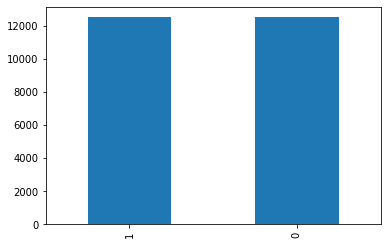

In [10]:
df['category'].value_counts().plot.bar()

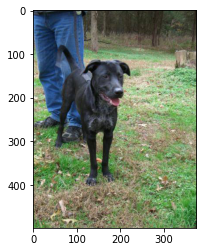

In [11]:
sample = random.choice(filenames)
image = load_img("../working/train/train/"+sample)
plt.imshow(image)

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [15]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [16]:
df.head(10)

,filename,category
0,dog.9418.jpg,dog
1,cat.4019.jpg,cat
2,dog.11402.jpg,dog
3,cat.573.jpg,cat
4,dog.12428.jpg,dog
5,cat.5434.jpg,cat
6,dog.5130.jpg,dog
7,dog.6767.jpg,dog
8,dog.4848.jpg,dog
9,dog.9142.jpg,dog


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_df, validation_df = train_test_split(df,test_size=0.2,random_state = 42)

In [19]:
train_df = train_df.reset_index(drop=True)
train_df

,filename,category
0,dog.7814.jpg,dog
1,cat.5151.jpg,cat
2,dog.3909.jpg,dog
3,cat.4556.jpg,cat
4,dog.10688.jpg,dog
...,...,...
19995,cat.10618.jpg,cat
19996,cat.11888.jpg,cat
19997,cat.6320.jpg,cat
19998,cat.11150.jpg,cat


In [20]:
validation_df = validation_df.reset_index(drop=True)
validation_df

,filename,category
0,cat.6995.jpg,cat
1,cat.3797.jpg,cat
2,dog.7438.jpg,dog
3,dog.2207.jpg,dog
4,dog.3683.jpg,dog
...,...,...
4995,dog.11659.jpg,dog
4996,cat.5798.jpg,cat
4997,dog.4391.jpg,dog
4998,cat.656.jpg,cat


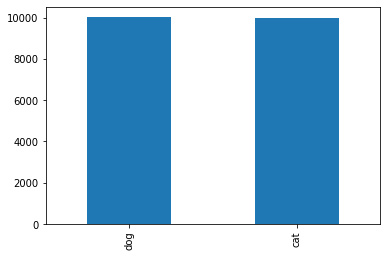

In [21]:
train_df['category'].value_counts().plot.bar()

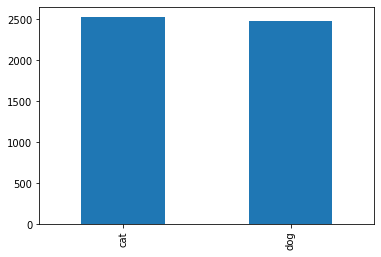

In [22]:
validation_df['category'].value_counts().plot.bar()

In [23]:
total_train = train_df.shape[0]
total_validation = validation_df.shape[0]
batch_size = 200

In [24]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../working/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [25]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df, 
    "../working/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [26]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../working/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


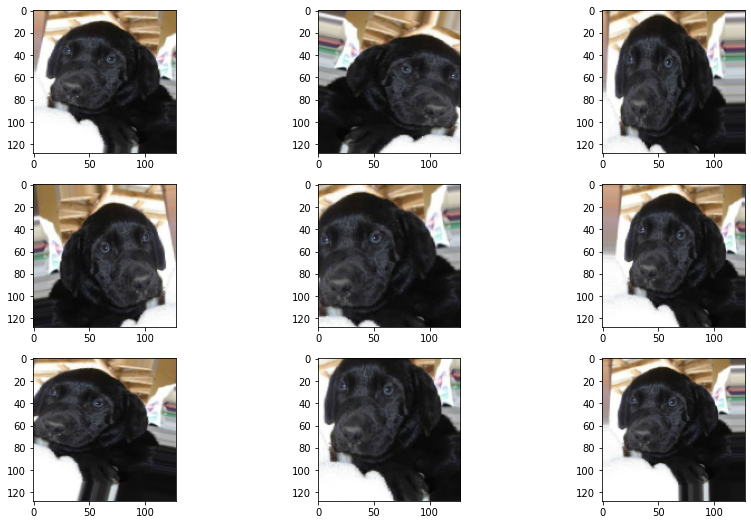

In [27]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [28]:

epochs=10

history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validation//batch_size,
    steps_per_epoch=total_train//batch_size,
)

Epoch 1/10
100/100 [==============================] - 728s 7s/step - loss: 0.8338 - accuracy: 0.6327 - val_loss: 4.3974 - val_accuracy: 0.5054
Epoch 2/10
100/100 [==============================] - 712s 7s/step - loss: 0.6425 - accuracy: 0.6937 - val_loss: 1.9516 - val_accuracy: 0.5058
Epoch 3/10
100/100 [==============================] - 713s 7s/step - loss: 0.5445 - accuracy: 0.7429 - val_loss: 1.5728 - val_accuracy: 0.5138
Epoch 4/10
100/100 [==============================] - 712s 7s/step - loss: 0.4823 - accuracy: 0.7789 - val_loss: 0.6758 - val_accuracy: 0.6746
Epoch 5/10
100/100 [==============================] - 712s 7s/step - loss: 0.4486 - accuracy: 0.7965 - val_loss: 0.6903 - val_accuracy: 0.6376
Epoch 6/10
100/100 [==============================] - 714s 7s/step - loss: 0.4158 - accuracy: 0.8091 - val_loss: 0.5204 - val_accuracy: 0.7854
Epoch 7/10
100/100 [==============================] - 715s 7s/step - loss: 0.3880 - accuracy: 0.8241 - val_loss: 0.4007 - val_accuracy: 0.8352

<Figure size 432x288 with 0 Axes>

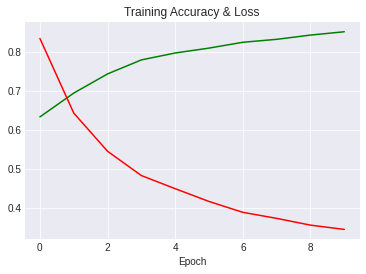

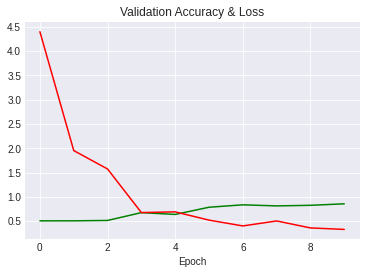

<Figure size 432x288 with 0 Axes>

In [63]:
#plt.style.use('seaborn-dark')
plt.style.use('seaborn-darkgrid')
plt.plot(history.history['accuracy'],'green',label='Accuracy')
plt.plot(history.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()
plt.plot(history.history['val_accuracy'],'green',label='Accuracy')
plt.plot(history.history['val_loss'],'red',label='Loss')
plt.title('Validation Accuracy & Loss')
plt.xlabel('Epoch')
plt.figure()

In [85]:
test_file = os.listdir('../working/test/test1')

8547.jpg


array([[0., 1.]], dtype=float32)

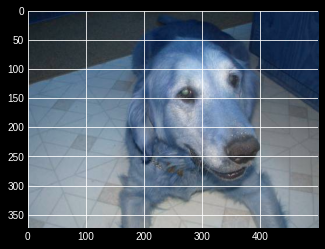

In [84]:
plt.style.use('dark_background')
directory = os.listdir("../working/test/test1")
print(directory[12])

img = cv2.imread("../working/test/test1/" + directory[12])
plt.imshow(img)

img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
img = img.reshape(1,IMAGE_WIDTH,IMAGE_HEIGHT,3)

pred = model.predict(img)
pred